In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import missingno as msno
%matplotlib inline

# Versions 
print('Version des librairies utilisées :')
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)

Version des librairies utilisées :
NumPy         : 1.20.1
Pandas        : 1.2.4
Matplotlib    : 3.3.4


In [2]:
pd.set_option('display.max_row',200)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

### <span>1. Chargement et description des données </span>

#### 1.1. EdStatsCountry.csv

In [3]:
country = pd.read_csv(r"C:\Users\elodi\Downloads\Projet+Python_Dataset_Edstats_csv\EdStatsCountry.csv")

In [4]:
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [5]:
# Nom des colonnes
country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [6]:
# Nombre de lignes/colonnes
country.shape

(241, 32)

<AxesSubplot:>

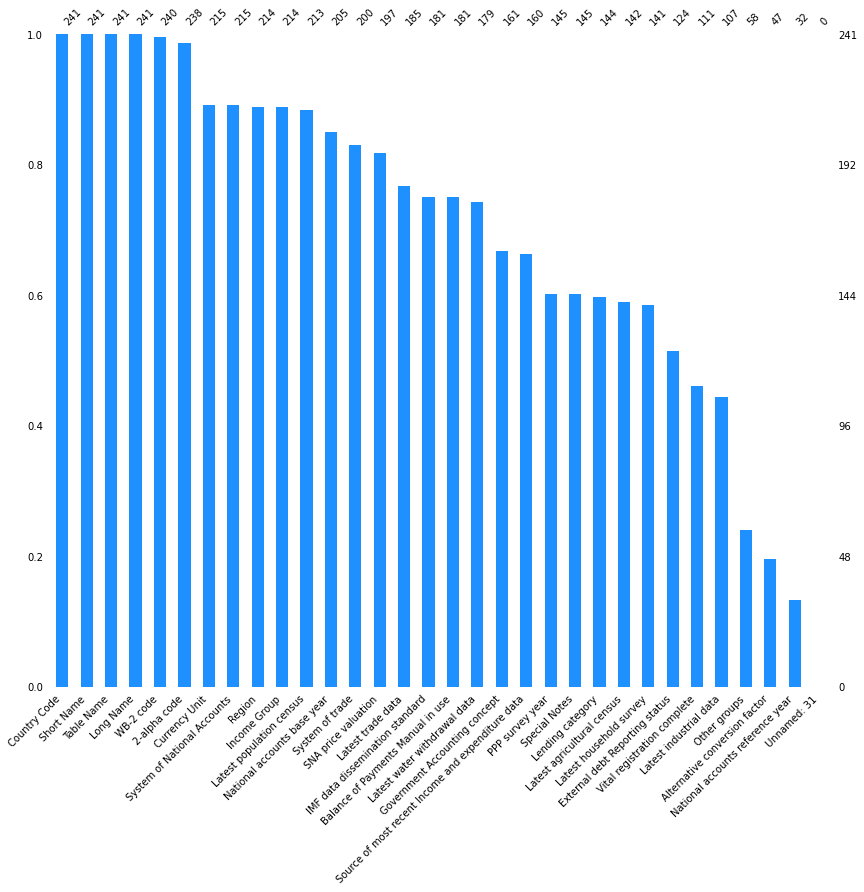

In [7]:
# Valeurs manquantes
msno.bar(country, color="dodgerblue", sort="descending", figsize=(14,12), fontsize=10)

In [8]:
# Doublons
country[country.duplicated(keep=False)].shape[0]

0

In [9]:
# Remplacement la région 'NaN' par 'A Completer'
country['Region'] = country['Region'].replace(np.nan, 'A Completer')
# Remplacement le groupe de revenus 'NaN' par 'A Completer'
country['Income Group'] = country['Income Group'].replace(np.nan, 'A Completer')

In [10]:
print(country['Income Group'].unique())
print(country['Region'].unique())

['High income: nonOECD' 'Low income' 'Upper middle income' 'A Completer'
 'Lower middle income' 'High income: OECD']
['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'A Completer' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


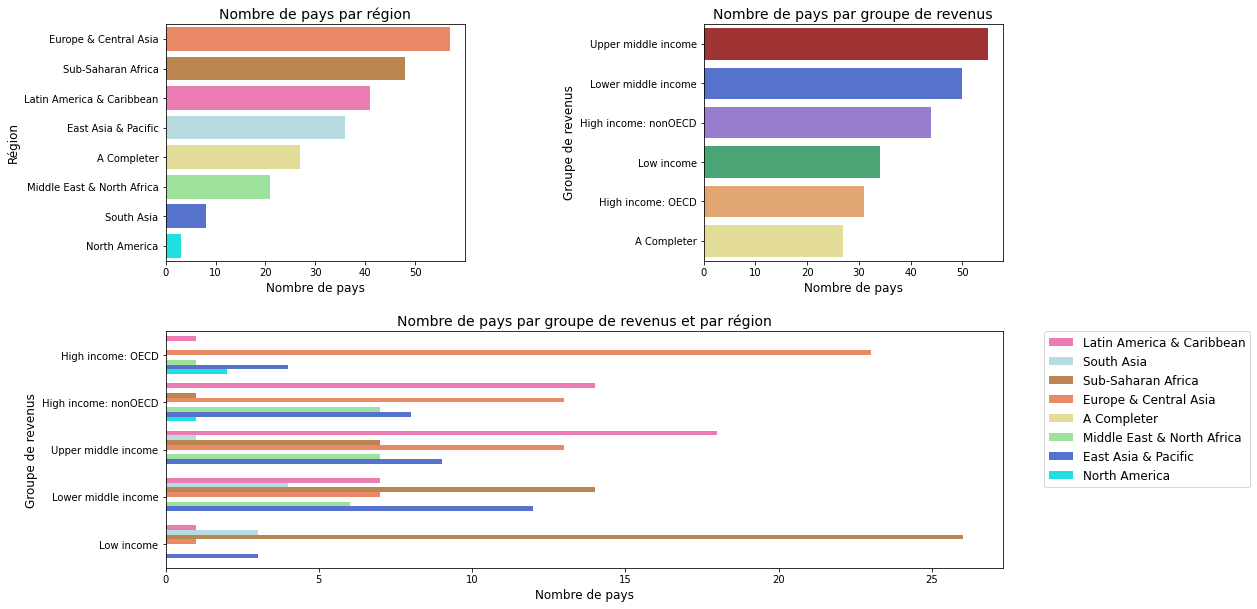

In [11]:
# Regroupement des pays/régions/groupes de revenus

fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# Graphique ligne 1, colonne 1 ------------------
plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par région', fontsize=14)

# Graphique ligne 1, colonne 2 ------------------
plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['FireBrick','RoyalBlue','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Nombre de pays par groupe de revenus', fontsize=14)

# Graphique ligne 2, sur les 2 colonnes ------------------
plt.subplot(grid[1, :])
# Regroupement des pays par groupe de revenus
colors = ['HotPink','PowderBlue','Peru','Coral','Khaki','LightGreen','RoyalBlue','Cyan']
sns.countplot(y='Income Group', hue='Region', data=country, orient='h',
                   order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],
                   palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupe de revenus et par région', fontsize=14)
plt.grid(False)

plt.show()
#plt.savefig('country.jpg')

#### 1.2 EdStatsCountry-Series

In [12]:
country_series = pd.read_csv(r"C:\Users\elodi\Downloads\Projet+Python_Dataset_Edstats_csv\EdStatsCountry-Series.csv")

In [13]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [14]:
country_series.shape

(613, 4)

In [15]:
country_series.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [16]:
# Doublon
country_series[country_series.duplicated(keep=False)].shape[0]

0

<AxesSubplot:>

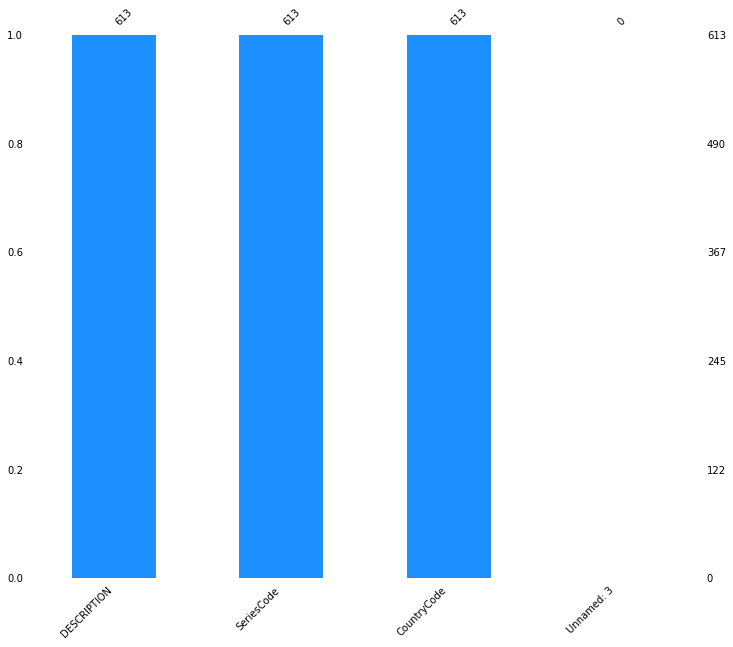

In [17]:
msno.bar(country_series, color="dodgerblue", sort="descending", figsize=(12,10), fontsize=10)

Pays présents dans EdStatsCountry mais pas dans ce jeu de données EdStatsCountry-Series

In [18]:
country['Country Code'].nunique() == country_series['CountryCode'].nunique()

False

In [19]:
# Recherche des pays n'apparaissant pas dans EdStatsCountry-Series
country[~country['Country Code'].isin(country_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


In [20]:
country[~country['Country Code'].isin(country_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


##### Nombre de pays par indicateur et par description

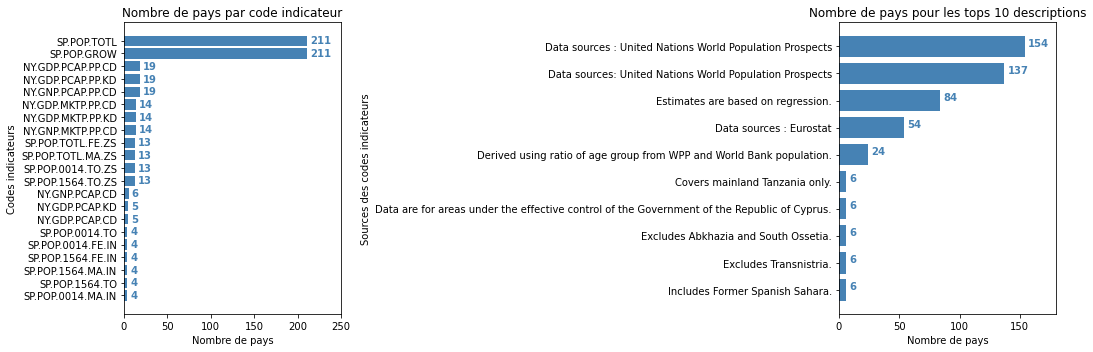

In [21]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  

# Graphique ligne 1, colonne 1 ------------------
# Regroupement des pays par code indicateur
serie_code = country_series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code=country_series.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()
ax1=ax[0]
ax1.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12)
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_xlim([0, 250])
ax1.grid(False)

# Graphique ligne 1, colonne 2 ------------------
# Regroupement des pays par les 10 descriptions des sources des indicateurs les plus fréquentes
description = country_series.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(10)
nb_pays_par_description=country_series.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(10)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 3, i + .01, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12)
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
ax2.grid(False)

fig.tight_layout()
plt.show()

#### 1.3 EdStatsFootNote

In [22]:
foot_note = pd.read_csv(r"C:\Users\elodi\Downloads\Projet+Python_Dataset_Edstats_csv\EdStatsFootNote.csv")

In [23]:
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [24]:
foot_note.shape

(643638, 5)

In [25]:
foot_note.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

<AxesSubplot:>

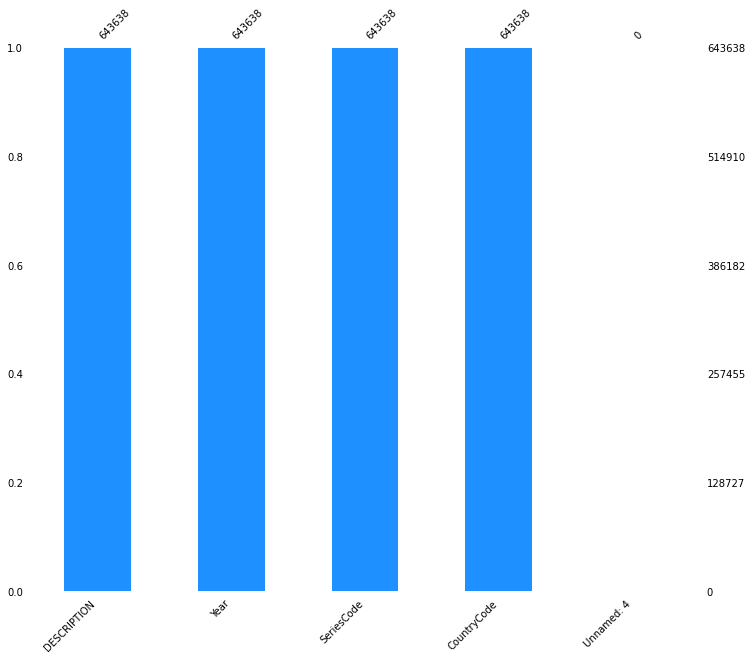

In [26]:
# Valeurs manquantes
msno.bar(foot_note, color="dodgerblue", sort="descending", figsize=(12,10), fontsize=10)

##### Top 10 Code indicateur,  descriptions et des mises à jour d'indicateur par années (par nombre de pays)

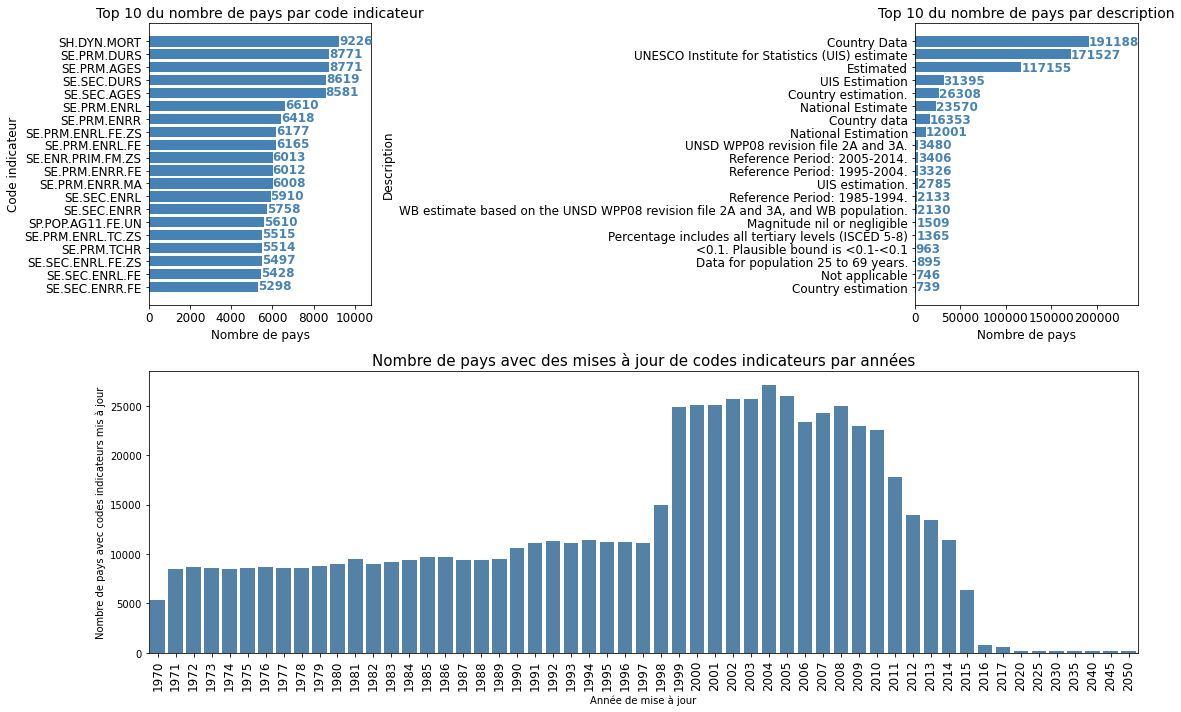

In [27]:
# Regroupement des pays par code indicateur et des pays par description

plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)

# Graphique ligne 1, colonne 1 ------------------
ax1 = plt.subplot(G[0, 0])
# Top 10 du nombre de pays par code indicateur
serie_code = foot_note.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode'].tail(20)
nb_pays_par_serie_code=foot_note.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax1.barh(y = serie_code, width=nb_pays_par_serie_code,color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax1.set_title('Top 10 du nombre de pays par code indicateur', fontsize=14)
ax1.set_xlabel('Nombre de pays', fontsize='12')
ax1.set_ylabel('Code indicateur', fontsize='12')
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 10800])

# Graphique ligne 1, colonne 2 ------------------
ax2 = plt.subplot(G[0, 1])
# Top 10 du nombre de pays par description
description = foot_note.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(20)
nb_pays_par_description=foot_note.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 10, i - .3, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax2.set_title('Top 10 du nombre de pays par description', fontsize='14')
ax2.set_xlabel('Nombre de pays', fontsize='12')
ax2.set_ylabel('Description', fontsize='12')
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 245000])

# Graphique ligne 2, sur les 2 colonnes ------------------
ax3 = plt.subplot(G[1, :])
# Pour plus de lisibilité, transformer par exemple 'YR2001' en '2001'
foot_note['Annee']=[row[-4:] for row in foot_note['Year']]
# Nombre de pays avec des mises à jour d'indicateur par années
ax3.set_title('Nombre de pays avec des mises à jour de codes indicateurs par années', size=15)
ax3 = sns.barplot(y = 'CountryCode', x='Annee', data = foot_note.groupby('Annee').count().reset_index(), color='SteelBlue')
ax3.set_xticklabels(labels = foot_note.groupby('Annee').count().reset_index()['Annee'], rotation=90, size=12)
ax3.set_xlabel('Année de mise à jour')
ax3.set_ylabel('Nombre de pays avec codes indicateurs mis à jour')

plt.tight_layout()
plt.show()

#### 1.4 EdStatsSeries

In [28]:
series = pd.read_csv(r"C:\Users\elodi\Downloads\Projet+Python_Dataset_Edstats_csv\EdStatsSeries.csv")

In [29]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Nom des colonnes
series.columns.to_list()

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

In [31]:
series.shape

(3665, 21)

In [32]:
# Doublon
series[series.duplicated(keep=False)].shape[0]

0

<AxesSubplot:>

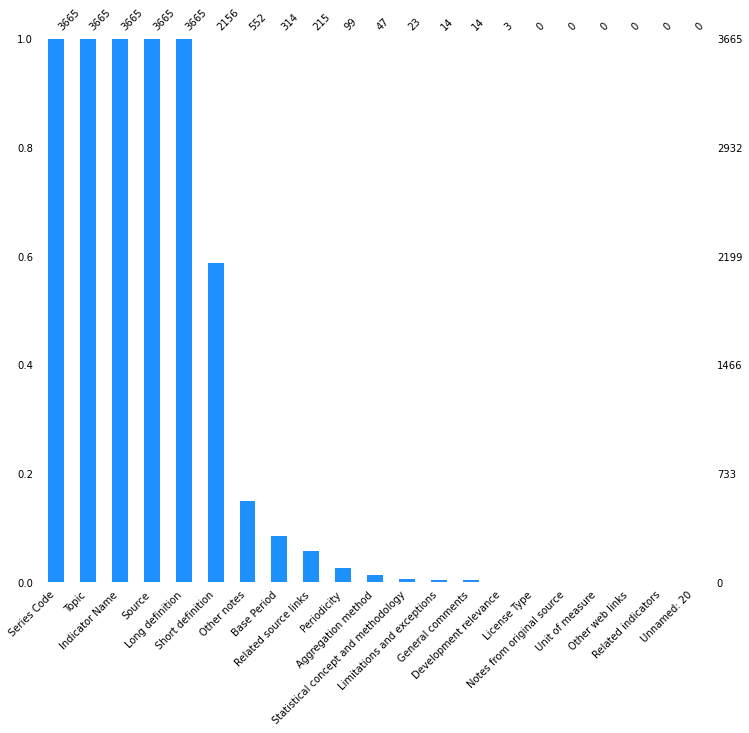

In [33]:
# Valeurs manquantes
msno.bar(series, color="dodgerblue", sort="descending", figsize=(12,10), fontsize=10)

In [34]:
# Nombre de Indicateur
topic=series['Topic'].nunique()
print(f'{topic} indicateurs')

37 indicateurs


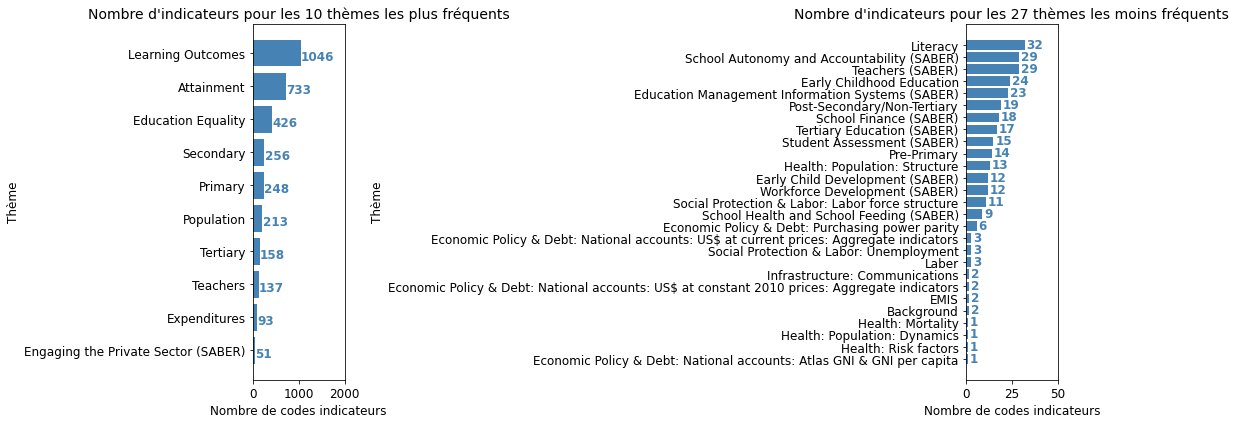

In [35]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  

# Graphique ligne 1, colonne 1 ------------------
# Top 10 des thèmes les plus fréquents 
theme = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1=ax[0]
ax1.barh(y = theme, width=nb_code_par_theme, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les 10 thèmes les plus fréquents', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])

# Graphique ligne 1, colonne 2 ------------------
# last 27 thèmes les moins fréquents
theme_moins = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(27)
nb_code_par_theme_moins=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(27)
ax2=ax[1]
ax2.barh(y = theme_moins, width=nb_code_par_theme_moins, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les 27 thèmes les moins fréquents', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])

fig.tight_layout()
plt.show()

In [36]:
# Extraction des nom courts et longs des indicateurs pour analyser EdStatsData.csv
df_tmp=series[['Series Code','Indicator Name', 'Short definition', 'Long definition']]
df_tmp.to_csv('Indicateurs.txt', header=True, index=None, sep=',', mode='w')

#### 1.5 EdStatsData 

In [37]:
df_data = pd.read_csv(r"C:\Users\elodi\Downloads\Projet+Python_Dataset_Edstats_csv\EdStatsData.csv", low_memory=False)

In [38]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.82212,54.89414,56.20944,57.26711,57.99114,59.36554,60.99996,61.92268,62.69342,64.38319,65.61777,66.08515,66.60814,67.29045,68.51009,69.03321,69.94491,71.04187,71.69378,71.6991,71.99582,72.60284,70.03272,70.46482,72.64568,71.81176,73.90351,74.4252,75.11082,76.25432,77.24568,78.80052,80.0514,80.80539,81.60706,82.48949,82.68551,83.28034,84.01187,84.19596,85.212,85.24514,86.10167,85.51194,85.32015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [40]:
# Sélection des colonnes
data = df_data[['Country Name', 'Country Code', 'Indicator Code','Indicator Name','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014','2015', '2016', '2017']]

In [41]:
data.shape

(886930, 22)

In [42]:
data[data.duplicated(keep=False)].shape[0]

0

<AxesSubplot:>

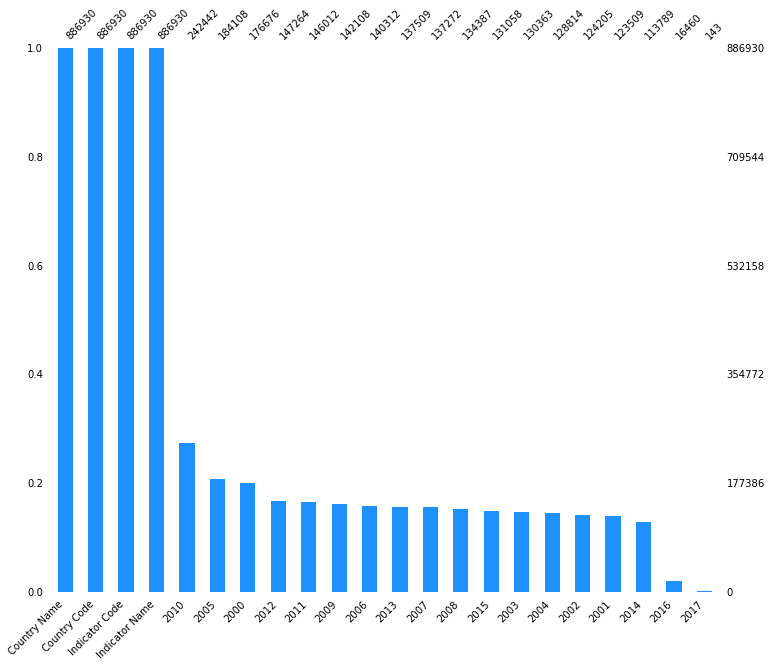

In [43]:
msno.bar(data, color="dodgerblue", sort="descending", figsize=(12,10), fontsize=10)

In [44]:
# Recherche du pays présent dans EdStatsData mais n'apparaissant pas dans EdStatsCountry-Series
df_pays_plus2=data[~data['Country Code'].isin(country_series['CountryCode'])][['Country Name']].sort_values(by = 'Country Name')
df_pays_plus2.drop_duplicates(inplace=True)
df_pays_plus2

,Country Name
0,Arab World
193025,British Virgin Islands
278539,Curacao
4884,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10996,Euro area
14661,Europe & Central Asia
21989,Europe & Central Asia (excluding high income)
23208,European Union
25656,Heavily indebted poor countries (HIPC)


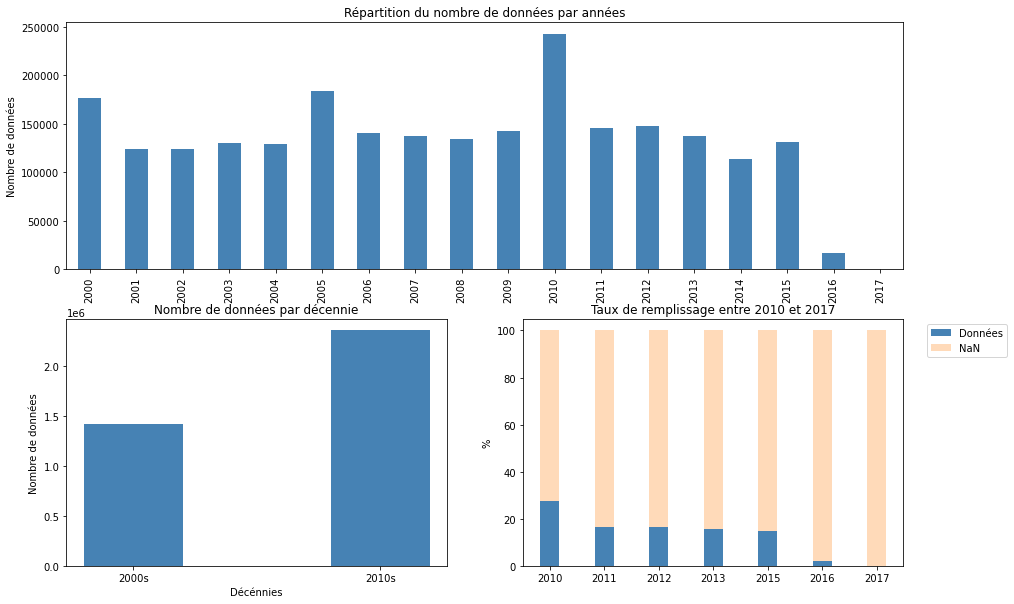

In [45]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

# Graphique ligne 1, sur les 2 colonnes ------------------
ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = data.loc[:,'2000':'2017'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)


# Graphique ligne 2, colonne 1 ------------------
ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie, les années 70, 80...
decade=data.loc[:,'2000':'2017'].copy().count()
ans=['2000s','2010s']
for i in range(2):
    j=i*10
    k=j+10
    decade[ans[i]]=decade[j:k,].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4   
ax2.bar(decade[ans].index, decade[ans].values, width, color='SteelBlue')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Décénnies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)

# Graphique ligne 2, colonne 2 ------------------
ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot=data.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees=['2010','2011','2012','2013','2015','2016','2017']
nb_nonnul=data.copy()[annees].count()
df_2010s = pd.DataFrame({'annee':nb_nonnul.index, 'nb_nonnul':nb_nonnul.values})
# Taux de données non nulles par année de la décénnie 2010
df_2010s['%_nonnul']=round((df_2010s['nb_nonnul'])*100/nb_tot,2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan']=round(100-df_2010s['%_nonnul'],2)
width = 0.35      
annes=df_2010s.index
taux_remplissage=df_2010s['%_nonnul']
taux_nan=df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage, label='NaN', color='PeachPuff')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1),loc = 2)
ax3.grid(False)

plt.show()

**Conclusion**

****Les différents datasets contiennent les données suivantes :****

***1.1 EdStatsCountry :***
- Country Code
- Table Name : nom du pays selon la norme ISO
- Region : region où se situe le pays
- IncomeGroup : classe de revenue du pays

***1.2 EdStatsCountry-Series :***
- Serie Code : le code unique de l'indicateur
- Country code : le code unique du pays
- description : source des données de l'indicateur

***1.3 EdStatsFootNote :***
- Mêmes données que dans EdStatsCountry en plus : 
- L'année de l'indicateur 
- Description de la provenance des données

***1.4 EdStatsSeries :***
- Series Code
- Topic : sujet de l'indicateur
- Indicator name : nom de l'indicateur

***1.5 EdStatsData :***
- Country name : nom des pays
- Country code : code du pays
- Indicator Name : nom de l'indicateur
- Indicator Code : code de l'indicateur
- Années :années de chaques données


- De nombreuses données manquantes ont été repéré et seront traitées dans les parties suivantes ;
- Dans EdStatsData : beaucoup de données manquantes avant 2000 pour cela nous avons gardés que les années entre 2000 et 2017

### 2. Sélection des indicateurs

#### 2.1 Réduction du nombre d'années
Les années de 2010 à 2015 sont celle qui contiennent le plus de données, nous allons donc sélectionner dans un premier temps ces dernières

In [46]:
cols_annees= data.columns[14:21].tolist()

#### 2.2 Suppression des pays hors norme ISO

In [47]:
# Recherche des codes pays des regroupements de pays
df_pays_en_trop=data[~data['Country Code'].isin(country_series['CountryCode'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
df_pays_en_trop.drop_duplicates(inplace=True)
df_pays_en_trop
iso3_a_suppr=df_pays_en_trop['Country Code'].to_list()
iso3_a_suppr.remove('VGB')
iso3_a_suppr.remove('CUW')
iso3_a_suppr.remove('NRU')
iso3_a_suppr.remove('SXM')
iso3_a_suppr.remove('SSD')
iso3_a_suppr.remove('MAF')    
# df_pays=df_pays[~df_pays['Country Code'].isin(iso3_a_suppr)]
print(f'Pays hors norme ISO : {iso3_a_suppr}')

Pays hors norme ISO : ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']


#### 2.3 Réduction des données par seuil du taux de remplissage

In [48]:
df_taux_indicateurs = data.copy()
df_taux_indicateurs=df_taux_indicateurs[~df_taux_indicateurs['Country Code'].isin(iso3_a_suppr)]
df_taux_indicateurs = df_taux_indicateurs.groupby('Indicator Code')[cols_annees].count()
df_taux_indicateurs=df_taux_indicateurs.reset_index()
df_taux_indicateurs['TOT']=df_taux_indicateurs[cols_annees].sum(axis=1)
# Chaque indicateur peut être associé à 242 pays pour chaque année (6 années) : 242*6=1452
df_taux_indicateurs['%']=round((df_taux_indicateurs['TOT'])*100/1452,2)
# Indicateurs statistiques
display(df_taux_indicateurs[['TOT','%']].describe().T)
quantile_80=df_taux_indicateurs[['%']].quantile(0.8).to_string()
print(f'Qantile 80% : {quantile_80}')
quantile_90=df_taux_indicateurs[['%']].quantile(0.9).to_string()
print(f'Qantile 90% : {quantile_90}')

,count,mean,std,min,25%,50%,75%,max
TOT,3665.0,242.50723,315.41676,0.0,15.00,135.0,332.00,1488.00
%,3665.0,16.70248,21.72249,0.0,1.03,9.3,22.87,102.48


Qantile 80% : %    26.804
Qantile 90% : %    48.964


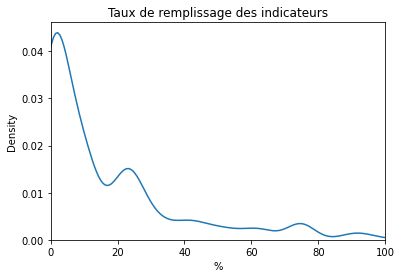

Indicateurs restants : 360


In [49]:
sns.kdeplot(df_taux_indicateurs['%'])
plt.grid(False)
plt.xlim([0,100])
plt.title('Taux de remplissage des indicateurs')
plt.show()

df_indic_reduit=df_taux_indicateurs[df_taux_indicateurs['%']>50]
print(f'Indicateurs restants : {df_indic_reduit.shape[0]}')

- 25% des indicateurs ont un taux de remplissage supérieur à 23%
- 10% des indicateurs ont un taux de remplissage supérieur à 48%
- Le seuil de taux de remplissage des indicateurs fixés à 50% 

**Cible**
- 15-24 ans 
- Education : lycée + enseignement supérieur
- moyen de communication : internet, électricité
    
**Les différents mots clés à rechercher** 

- 15 : pour la cible de la population des 15-19 ans
- 20 : pour la cible de la population des 20-24 ans
- SEC : pour les regroupements par lycéens
- TER : pour les regroupements par étudiants de l'enseignement supérieur
- IT : pour l'accès aux infrastructures techniques
- EG : pour l'accès aux informations sur l'énergie
- GPD : revenus

#### 2.4 Recherche par mots-clés

In [50]:
# Ajout du nom court de l'indicateur pour plus de compréhension
df_work_indic=series[['Series Code', 'Indicator Name','Topic','Long definition']]
df_work_indic.drop_duplicates(inplace=True)
df_indic_reduit = pd.merge(df_indic_reduit, df_work_indic, how='left', left_on='Indicator Code', right_on='Series Code')
df_indic_reduit.drop(columns=['Series Code'],inplace=True)

***Cible : lycéens 15-19 ans***

In [51]:
pd.set_option('max_colwidth', None)
liste_lycee_age =[row for row in df_indic_reduit['Indicator Code'] if ('15') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_lycee_age)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
141,SP.POP.1015.FE.UN,"Population, ages 10-15, female",Population,"Population, ages 10-15, female is the total number of females age 10-15."
142,SP.POP.1015.MA.UN,"Population, ages 10-15, male",Population,"Population, ages 10-15, male is the total number of males age 10-15."
143,SP.POP.1015.TO.UN,"Population, ages 10-15, total",Population,"Population, ages 10-15, total is the total population age 10-15."
153,SP.POP.1115.FE.UN,"Population, ages 11-15, female",Population,"Population, ages 11-15, female is the total number of females age 11-15."
154,SP.POP.1115.MA.UN,"Population, ages 11-15, male",Population,"Population, ages 11-15, male is the total number of males age 11-15."
155,SP.POP.1115.TO.UN,"Population, ages 11-15, total",Population,"Population, ages 11-15, total is the total population age 11-15."
165,SP.POP.1215.FE.UN,"Population, ages 12-15, female",Population,"Population, ages 12-15, female is the total number of females age 12-15."
166,SP.POP.1215.MA.UN,"Population, ages 12-15, male",Population,"Population, ages 12-15, male is the total number of males age 12-15."
167,SP.POP.1215.TO.UN,"Population, ages 12-15, total",Population,"Population, ages 12-15, total is the total population age 12-15."
195,SP.POP.1524.FE.UN,"Population, ages 15-24, female",Population,"Population, ages 15-24, female is the total number of females age 15-24."


***Cible : enseignement supérieur 20-24 ans***

In [52]:
liste_fac_age =[row for row in df_indic_reduit['Indicator Code'] if ('20') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(liste_fac_age)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
262,SP.POP.AG20.FE.UN,"Age population, age 20, female, UNESCO",Population,"Age population, female refers to female population at the specified age level, as estimated by the UNESCO Institute for Statistics."
263,SP.POP.AG20.MA.UN,"Population, age 20, male",Population,"Population, age 20, male refers to the male population at the specified age."
264,SP.POP.AG20.TO.UN,"Age population, age 20, total, UNESCO",Population,"Age population, total refers to total population at the specified age level, as estimated by the UNESCO Institute for Statistics."


***Cible : éducation lycée***

In [53]:
educ_lycee =[row for row in df_indic_reduit['Indicator Code'] if ('SEC') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(educ_lycee)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
16,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parity index (GPI)",Secondary,"Ratio of female gross enrolment ratio for secondary to male gross enrolment ratio for secondary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
50,SE.SEC.AGES,Official entrance age to lower secondary education (years),Secondary,"Age at which students would enter lower secondary education, assuming they had started at the official entrance age for the lowest level of education, had studied full-time throughout and had progressed through the system without repeating or skipping a grade."
51,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)",Secondary,"Total number of new female entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total female population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
52,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)",Secondary,"Total number of new male entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total male population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
53,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)",Secondary,"Total number of new entrants in the last grade of lower secondary education, regardless of age, expressed as percentage of the total population of the theoretical entrance age to the last grade of lower secondary. This indicator is also known as ""Gross intake rate to the last grade of lower secondary general education."" The ratio can exceed 100 percent due to over-aged and under-aged children who enter lower secondary school late/early and/or repeat grades. Data limitations preclude adjusting for students who drop out during the final year of lower secondary education. Thus this rate is a proxy that should be taken as an upper estimate of the actual lower secondary completion rate."
54,SE.SEC.DURS,Theoretical duration of secondary education (years),Secondary,Number of grades (years) in secondary education (ISCED 2 and 3).
55,SE.SEC.DURS.LO,NaN,NaN,NaN
56,SE.SEC.DURS.UP,Theoretical duration of upper secondary education (years),Secondary,Number of grades (years) in upper secondary education.
57,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (number)",Secondary,Total number of students enrolled at public and private secondary education institutions regardless of age.
58,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Secondary,Total number of female students enrolled at public and private secondary education institutions regardless of age.


***Cible : éducation enseignement supérieur***

In [54]:
educ_fac=[row for row in df_indic_reduit['Indicator Code'] if ('TER') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(educ_fac)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
17,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity index (GPI)",Tertiary,"Ratio of female gross enrolment ratio for tertiary to male gross enrolment ratio for tertiary. It is calculated by dividing the female value for the indicator by the male value for the indicator. A GPI equal to 1 indicates parity between females and males. In general, a value less than 1 indicates disparity in favor of males and a value greater than 1 indicates disparity in favor of females."
79,SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",Tertiary,The total number of students enrolled at public and private tertiary education institutions.
80,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programmes, female (number)",Tertiary,The total number of female students enrolled at public and private tertiary education institutions.
81,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education who are female (%),Tertiary,Number of female students at the tertiary education level (ISCED 5 to 8) expressed as a percentage of the total number of students (male and female) at the tertiary education level (ISCED 5 to 8) in a given school year.
82,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Tertiary,"Total enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total population of the five-year age group following on from secondary school leaving."
83,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)",Tertiary,"Total female enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total female population of the five-year age group following on from secondary school leaving."
84,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)",Tertiary,"Total male enrollment in tertiary education (ISCED 5 to 8), regardless of age, expressed as a percentage of the total male population of the five-year age group following on from secondary school leaving."
304,SP.TER.TOTL.FE.IN,"Population of the official age for tertiary education, female (number)",Population,Female population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
305,SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)",Population,Population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.
306,SP.TER.TOTL.MA.IN,"Population of the official age for tertiary education, male (number)",Population,Male population of the age-group theoretically corresponding to tertiary education as indicated by theoretical entrance age and duration.


***Cible : internet***

In [55]:
internet=[row for row in df_indic_reduit['Indicator Code'] if ('IT') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(internet)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
0,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,"Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc."


***Cible : accès à l'éléctricité***

In [56]:
# Cible : énergie, accès à l'éléctricité
energie=[row for row in df_indic_reduit['Indicator Code'] if ('EG') in row ]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(energie)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition


***Cible : économie***

In [57]:
GPD=[row for row in df_indic_reduit['Indicator Code'] if ('GDP') in row]
df_indic_reduit[df_indic_reduit['Indicator Code'].isin(GPD)][['Indicator Code','Indicator Name','Topic','Long definition']]

,Indicator Code,Indicator Name,Topic,Long definition
1,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
2,NY.GDP.MKTP.KD,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2010 U.S. dollars. Dollar figures for GDP are converted from domestic currencies using 2010 official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used."
3,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).
4,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2011 international dollars.
5,NY.GDP.PCAP.CD,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.
6,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,GDP per capita is gross 

#### 2.5 Indicateurs retenus

- Indicateur démographique retenu : **SP.POP.1524.TO.UN** 
- **SE.SEC.ENRR** taux brut de scolarisation dans le secondaire, pour les deux sexes (%) 
- **SE.TER.ENRR** taux brut de scolarisation dans l'enseignement supérieur, pour les deux sexes (%).
- **IT.NET.USER.P2** Utilisateurs d'Internet (pour 100 personnes).
- **NY.GDP.PCAP.PP.CD** RNB par habitant, PPA ($ international actuel)

***Taux de remplissage des indicateurs retenus (2010/2015)***

In [58]:
indicateurs_retenus=['SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD']
mask=df_indic_reduit['Indicator Code'].isin(indicateurs_retenus)
cols=['Indicator Code','Indicator Name','%']
df_indic_reduit[mask][cols]

,Indicator Code,Indicator Name,%
0,IT.NET.USER.P2,Internet users (per 100 people),97.25
12,NY.GNP.PCAP.PP.CD,"GNI per capita, PPP (current international $)",88.77
69,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",57.58
82,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",52.20
197,SP.POP.1524.TO.UN,"Population, ages 15-24, total",74.79


#### 3. Réduction du jeu de données et regroupement des données

#### 3.1 Indicateurs à conserver

In [59]:
df_pays=data.copy()

In [60]:
indicateurs_a_garder=['SP.POP.1524.TO.UN','SE.SEC.ENRR','SE.TER.ENRR','IT.NET.USER.P2','IT.CMP.PCMP.P2','NY.GNP.PCAP.PP.CD']
df_pays=df_pays[df_pays['Indicator Code'].isin(indicateurs_a_garder)]
print(f'Nombre de lignes restantes : {df_pays.shape[0]}')

Nombre de lignes restantes : 1452


In [61]:
df_pays_en_trop=df_pays[~df_pays['Country Code'].isin(country_series['CountryCode'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
df_pays_en_trop.drop_duplicates(inplace=True)
iso3_a_suppr=df_pays_en_trop['Country Code'].to_list()
iso3_a_suppr.remove('VGB')
iso3_a_suppr.remove('CUW')
iso3_a_suppr.remove('NRU')
iso3_a_suppr.remove('SXM')
iso3_a_suppr.remove('SSD')
iso3_a_suppr.remove('MAF')    
df_pays=df_pays[~df_pays['Country Code'].isin(iso3_a_suppr)]
ng_lignes=df_pays.shape[0]

#### 3.2 Suppression des indicateurs des pays avec aucune donnée (2010/2015)

In [62]:
df_pays.dropna(thresh = 5, inplace=True)
pourc_rgpt_non_chiffre=round(((ng_lignes-df_pays.shape[0])*100)/ng_lignes,2)
print(f'% de lignes sans indicateurs chiffrés supprimées : {pourc_rgpt_non_chiffre}')
print(f'Nombre de lignes restantes : {df_pays.shape[0]}')

% de lignes sans indicateurs chiffrés supprimées : 11.37
Nombre de lignes restantes : 1154


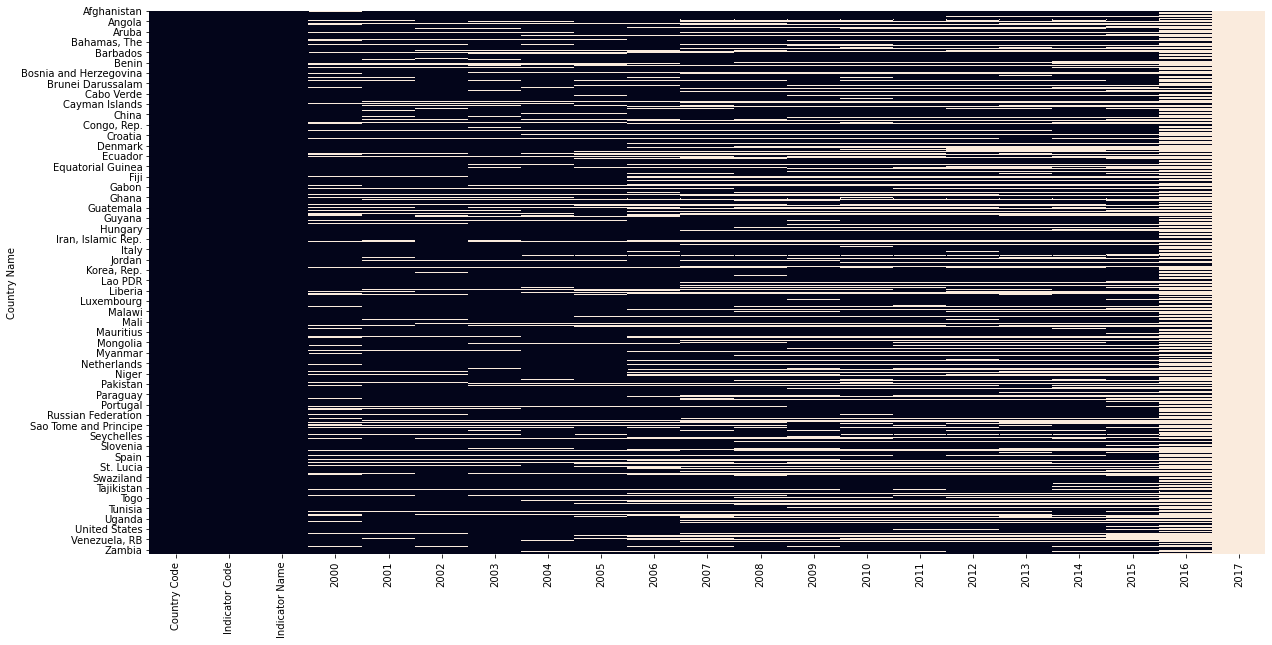

In [63]:
plt.figure(figsize=(20,10))
df_tmp=df_pays.set_index('Country Name')
sns.heatmap(df_tmp.isna(), cbar=False)
plt.show()  

#### 3.3. Regroupement des données nécessaires des différents datasets

Ajout des variables Région et Groupe de revenus

In [64]:
countries_income = pd.DataFrame({'Country_Code' : country['Country Code'].unique(), 
                                 'Region' : country['Region'], 
                                 'Income Group' : country['Income Group']})
df_pays = pd.merge(df_pays,countries_income, left_on='Country Code', right_on='Country_Code', how='left')
df_pays.drop(columns=['Country_Code'],inplace=True)
df_pays.columns

Index(['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       'Region', 'Income Group'],
      dtype='object')

Région et groupe de revenus NaN

In [65]:
df_pays[df_pays['Region'].isna()]

,Country Name,Country Code,Indicator Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Region,Income Group
148,British Virgin Islands,VGB,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",NaN,NaN,96.48698,97.0868,99.59160,106.68934,108.05295,103.22407,NaN,97.0030,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,NaN,NaN,NaN,NaN
149,British Virgin Islands,VGB,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,NaN,47.43429,NaN,68.47498,NaN,NaN,NaN,NaN,62.4871,NaN,NaN,NaN,NaN,NaN,41.64149,NaN,NaN,NaN,NaN


In [66]:
# Les Isles Vierges Britanique  appartiennent à la région 'Latin America & Caribbean'
df_pays.loc[[117, 118], 'Region'] = ['Latin America & Caribbean', 'Latin America & Caribbean']

In [67]:
df_pays[df_pays['Income Group'].isna()]

,Country Name,Country Code,Indicator Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Region,Income Group
148,British Virgin Islands,VGB,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",NaN,NaN,96.48698,97.0868,99.59160,106.68934,108.05295,103.22407,NaN,97.0030,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,NaN,NaN,NaN,NaN
149,British Virgin Islands,VGB,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,NaN,47.43429,NaN,68.47498,NaN,NaN,NaN,NaN,62.4871,NaN,NaN,NaN,NaN,NaN,41.64149,NaN,NaN,NaN,NaN


In [68]:
# Les Isles Vierges Britanique  appartiennent au groupe de revenus 'High income: nonOECD'
df_pays.loc[[117, 118], 'Income Group'] = ['High income: nonOECD', 'High income: nonOECD']

### 4. Analyse des indicateurs retenus

In [69]:
df_pays_fillna=df_pays.copy()
cols_to_interpolate=df_pays_fillna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_pays_fillna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_pays_fillna.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.fillna(method='ffill', axis=1, inplace=True)
df_pays_fillna = pd.concat([df_categ, df_numeric], axis=1)
nb_pays=df_pays_fillna['Country Name'].nunique()
print(f'Nombre de pays : {nb_pays}')
# On ne conserve que la dernière année totalement remplie : 2015
df_pays_1an=df_pays_fillna[['Country Name','Country Code','Indicator Name','Indicator Code', 'Region', 
                       'Income Group','2015']]
# # Dernière colonne remplie renommée en 'Last info'
df_pays_1an.rename(columns={'2015': 'Last info'}, inplace=True)
# # La méthode fillna transforme tous les types en object ==> retransformer la dernière colonne en numérique
df_pays_1an=df_pays_1an.astype({'Last info': 'float64'})
df_pays_1an

Nombre de pays : 210


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Last info
0,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,South Asia,Low income,1.88000e+03
1,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,South Asia,Low income,5.56444e+01
2,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,South Asia,Low income,8.66280e+00
3,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,South Asia,Low income,8.26000e+00
4,Afghanistan,AFG,Personal computers (per 100 people),IT.CMP.PCMP.P2,South Asia,Low income,3.90148e-01
...,...,...,...,...,...,...,...
1149,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Sub-Saharan Africa,Low income,4.75702e+01
1150,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Sub-Saharan Africa,Low income,8.43327e+00
1151,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,Sub-Saharan Africa,Low income,2.27428e+01
1152,Zimbabwe,ZWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,Sub-Saharan Africa,Low income,7.43114e+00


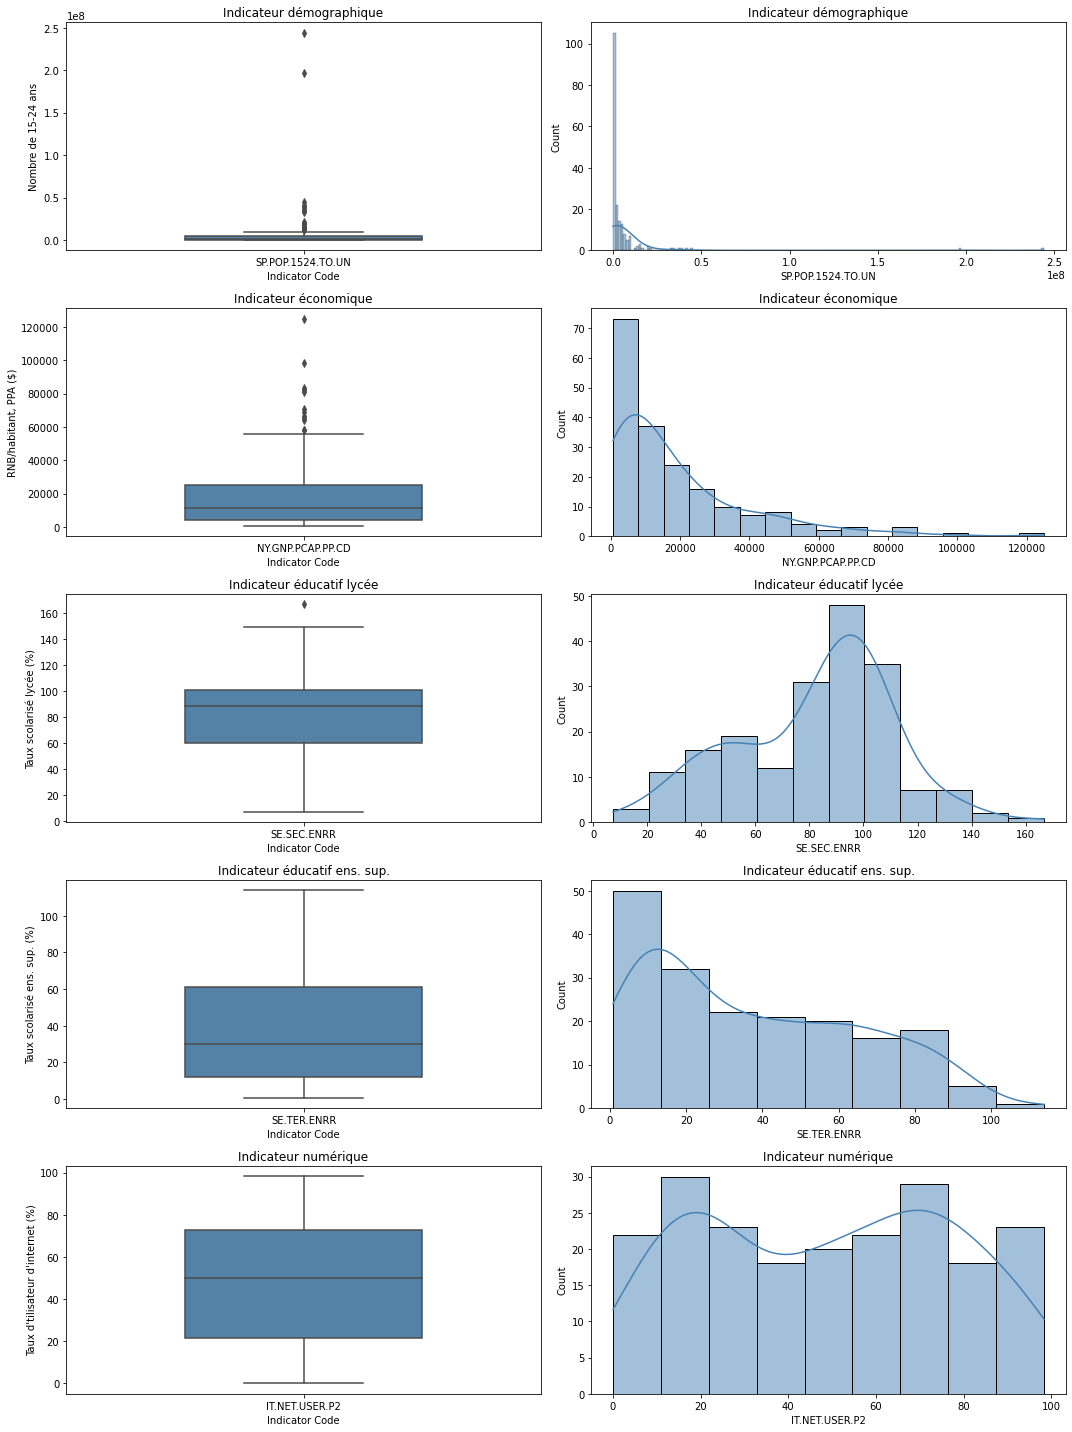

In [70]:
plt.figure(figsize = (15, 20))

# ------------------------------------------------------------------------------------
# Indicateur démographique : SP.POP.1524.TO.UN
# ------------------------------------------------------------------------------------
df_pop=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.1524.TO.UN']

plt.subplot(5,2,1)
sns.boxplot( x=df_pop['Indicator Code'], y=df_pop['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,2)
sns.histplot(df_pop['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xlabel('SP.POP.1524.TO.UN')

# ------------------------------------------------------------------------------------
# Indicateur économique : NY.GNP.PCAP.PP.CD
# ------------------------------------------------------------------------------------
df_eco=df_pays_1an[df_pays_1an['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']

plt.subplot(5,2,3)
sns.boxplot( x=df_eco['Indicator Code'], y=df_eco['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA ($)')

plt.subplot(5,2,4)
sns.histplot(df_eco['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')

# ------------------------------------------------------------------------------------
# Indicateur éducatif lycée : SE.SEC.ENRR
# ------------------------------------------------------------------------------------
df_edu_sec=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.SEC.ENRR']

plt.subplot(5,2,5)
sns.boxplot( x=df_edu_sec['Indicator Code'], y=df_edu_sec['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.ylabel('Taux scolarisé lycée (%)')

plt.subplot(5,2,6)
sns.histplot(df_edu_sec['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xlabel('SE.SEC.ENRR')

# ------------------------------------------------------------------------------------
# Indicateur éducatif lycée : SE.TER.ENRR
# ------------------------------------------------------------------------------------
df_edu_ter=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.TER.ENRR']

plt.subplot(5,2,7)
sns.boxplot( x=df_edu_ter['Indicator Code'], y=df_edu_ter['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.ylabel('Taux scolarisé ens. sup. (%)')

plt.subplot(5,2,8)
sns.histplot(df_edu_ter['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.xlabel('SE.TER.ENRR')

# ------------------------------------------------------------------------------------
# Indicateur numérique : SE.TER.ENRR
# ------------------------------------------------------------------------------------
df_num=df_pays_1an[df_pays_1an['Indicator Code'] == 'IT.NET.USER.P2']

plt.subplot(5,2,9)
sns.boxplot( x=df_num['Indicator Code'], y=df_num['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')

plt.subplot(5,2,10)
sns.histplot(df_num['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')

plt.tight_layout()

In [71]:
# Statistiques descriptives
mean_num=df_num['Last info'].mean()
mean_eco=df_eco['Last info'].mean()
mean_edu_sec=df_edu_sec['Last info'].mean()
mean_edu_ter=df_edu_ter['Last info'].mean()
mean_pop=df_pop['Last info'].mean()

median_num=df_num['Last info'].median()
median_eco=df_eco['Last info'].median()
median_edu_sec=df_edu_sec['Last info'].median()
median_edu_ter=df_edu_ter['Last info'].median()
median_pop=df_pop['Last info'].median()

var_num=df_num['Last info'].var(ddof=0)
var_eco=df_eco['Last info'].var(ddof=0)
var_edu_sec=df_edu_sec['Last info'].var(ddof=0)
var_edu_ter=df_edu_ter['Last info'].var(ddof=0)
var_pop=df_pop['Last info'].var(ddof=0)

std_num=df_num['Last info'].std(ddof=0)
std_eco=df_eco['Last info'].std(ddof=0)
std_edu_sec=df_edu_sec['Last info'].std(ddof=0)
std_edu_ter=df_edu_ter['Last info'].std(ddof=0)
std_pop=df_pop['Last info'].std(ddof=0)

skew_num=df_num['Last info'].skew()
skew_eco=df_eco['Last info'].skew()
skew_edu_sec=df_edu_sec['Last info'].skew()
skew_edu_ter=df_edu_ter['Last info'].skew()
skew_pop=df_pop['Last info'].skew()

kurtosis_num=df_num['Last info'].kurtosis()
kurtosis_eco=df_eco['Last info'].kurtosis()
kurtosis_edu_sec=df_edu_sec['Last info'].kurtosis()
kurtosis_edu_ter=df_edu_ter['Last info'].kurtosis()
kurtosis_pop=df_pop['Last info'].kurtosis()

data_stats = [['mean',mean_num, mean_eco, mean_edu_sec, mean_edu_ter, mean_pop],
        ['median', median_num, median_eco, median_edu_sec,median_edu_ter,median_pop],
        ['var',var_num, var_eco, var_edu_sec,var_edu_ter,var_pop], 
        ['std',std_num, std_eco,std_edu_sec, std_edu_ter, std_pop], 
        ['skew', skew_num, skew_eco, skew_edu_sec, skew_edu_ter, skew_pop], 
        ['kurtosis', kurtosis_num, kurtosis_eco, kurtosis_edu_sec, kurtosis_edu_ter, kurtosis_pop]]
df_stat = pd.DataFrame(data_stats,columns=['Desc','Stat_num','Stat_eco','Stat_edu_sec','Stat_edu_ter','Stat_pop'])
df_stat

,Desc,Stat_num,Stat_eco,Stat_edu_sec,Stat_edu_ter,Stat_pop
0,mean,48.52451,1.89547e+04,82.13105,37.35687,6.27429e+06
1,median,50.13932,1.15000e+04,88.36723,29.94090,1.15854e+06
2,var,809.92952,4.27830e+08,838.66579,778.07619,5.44206e+14
3,std,28.45926,2.06840e+04,28.95973,27.89402,2.33282e+07
4,skew,0.00371,1.97422e+00,-0.32694,0.50629,8.51617e+00
5,kurtosis,-1.26870,4.79609e+00,-0.14584,-0.95270,7.87605e+01


### 5. Score

In [72]:
df_interpolna=df_pays.copy()
cols_to_interpolate=df_interpolna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_interpolna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_interpolna.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.interpolate(method='linear', axis=1, inplace=True)
df_pays_all = pd.concat([df_categ, df_numeric], axis=1)
nb_pays=df_pays_all['Country Name'].nunique()
print(f'nombre de pays : {nb_pays}')

nombre de pays : 210


In [73]:
# on ne conserve que les 5 indicateurs avec, pour chaque indicateur et pays, 
#la dernière information réelle ou interpolée de 2015
df_score= df_pays_all.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']
df_score.shape

(210, 6)

Indicateurs manquants par pays

<AxesSubplot:xlabel='Indicator Code'>

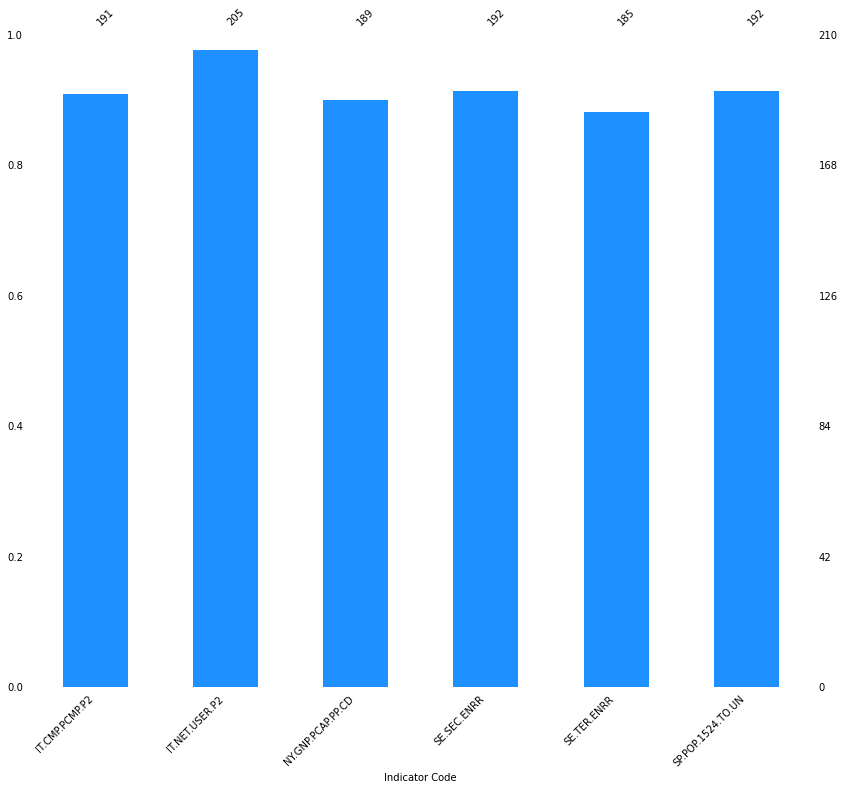

In [74]:
msno.bar(df_score, color="dodgerblue", figsize=(14,12), fontsize=10)

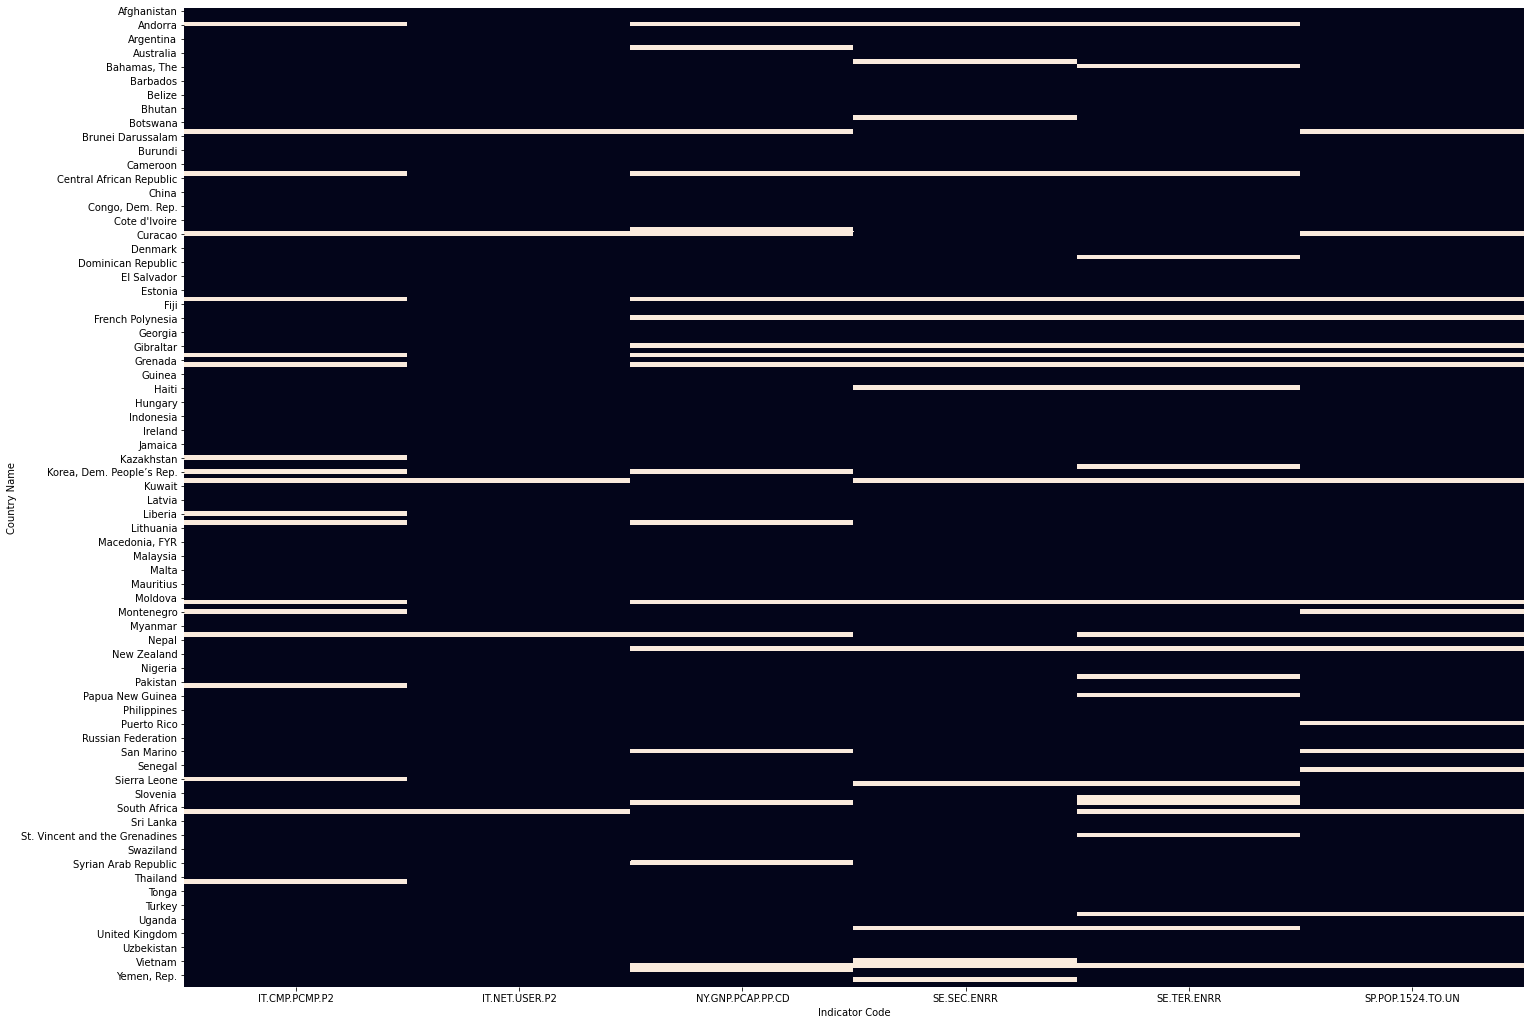

In [75]:
plt.figure(figsize=(24,18))
sns.heatmap(df_score.isna(), cbar=False)
plt.show()  

In [76]:
# Liste des pays avec au moins un indicateur manquant
s_pays_indic_manquant=df_score.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires=df_score.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
df_pays_retires

Nombre de pays à retirer : 24


Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,,
"Korea, Dem. People’s Rep.",NaN,0.00000,NaN,93.39609,28.05944,4023348.0
Haiti,5.25557,12.19770,1770.0,NaN,NaN,2164291.0
Somalia,0.88580,1.76000,NaN,7.35304,NaN,2094687.0
United Arab Emirates,28.71418,90.50000,70730.0,NaN,NaN,743608.0
Singapore,72.06156,79.01296,82470.0,NaN,NaN,679106.0
Andorra,NaN,96.91000,NaN,NaN,NaN,8715.0
Cayman Islands,NaN,77.00000,NaN,NaN,NaN,5789.0
Liechtenstein,NaN,96.64120,NaN,116.12344,33.54204,4251.0
British Virgin Islands,NaN,NaN,NaN,98.73356,41.64149,NaN


In [77]:
# On ne conserve que les pays avec les 5 indicateurs renseignés
df_score.dropna(thresh = 5, inplace=True)
print(f'Nombre de pays restant : {df_score.shape[0]}')

Nombre de pays restant : 186


Mise à l'échelle des données

In [78]:
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']

In [79]:
scaler_std = StandardScaler()
scaled_df_std= scaler_std.fit_transform(df_score[cols])
scaled_df_std = pd.DataFrame(scaled_df_std, columns=cols)

In [80]:
scaler_pow = PowerTransformer(method = 'box-cox')
df_score_scaled= scaler_pow.fit_transform(df_score[cols])
df_score_scaled = pd.DataFrame(df_score_scaled, columns=cols)

Score d'attractivité

In [81]:
# Calcul du score pour chaque pays en fonction des pondérations de chaque indicateur
df_score_scaled['Country Name'] = df_score.index
df_score_scaled['Score']=[(row[0] *4 + row[1] *1 + row[2] *2 + row[3] *3 + row[4]*4) for row in zip(df_score_scaled['IT.NET.USER.P2'], df_score_scaled['NY.GNP.PCAP.PP.CD'], df_score_scaled['SE.SEC.ENRR'], df_score_scaled['SE.TER.ENRR'], df_score_scaled['SP.POP.1524.TO.UN'])]
df_score_scaled.sort_values(by='Score',ascending=False).head(10)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
176,0.96756,1.55801,0.52155,1.40914,1.98254,United States,18.62895
8,1.24378,1.31163,2.00124,1.48996,0.44665,Australia,16.54571
175,1.44141,1.21152,1.63497,0.80012,0.96406,United Kingdom,16.50370
16,1.25705,1.31451,3.11754,1.20438,0.01896,Belgium,16.26677
84,1.41672,1.23644,0.67325,0.95906,1.21486,Japan,15.98642
120,1.43419,1.40240,1.92245,1.27230,0.25656,Netherlands,15.82717
152,1.08327,1.04376,1.70978,1.47872,0.64743,Spain,15.82231
89,1.37960,1.03698,0.56927,1.54006,0.86613,"Korea, Rep.",15.77862
64,1.32499,1.38776,0.70672,1.06543,1.02766,Germany,15.40811
139,0.93513,0.65124,0.77298,1.30859,1.32071,Russian Federation,15.14635


##### Score d'attractivité par région

In [82]:
# Ajout de la région et du groupe de revenus
region_income = pd.DataFrame({'Country_Name' : df_pays['Country Name'], 
                                 'Region' : df_pays['Region'], 
                                 'Income Group' : df_pays['Income Group']})
df_score_scaled_region = pd.merge(df_score_scaled, region_income, left_on='Country Name', right_on='Country_Name', how='inner')
df_score_scaled_region.drop(columns=['Country_Name'],inplace=True)
df_score_scaled_region.drop_duplicates(inplace=True)
df_score_scaled_region.sort_values(by='Score',ascending=False).head(10);

# Constitution du dataframe de visualisation du regroupement par pays
df_score_region = df_score_scaled_region.groupby('Region').mean()
df_score_region=df_score_region.rename(columns={'IT.NET.USER.P2':'num',
                                                'NY.GNP.PCAP.PP.CD':'eco',
                                                'SE.SEC.ENRR':'edu_sec',
                                                'SE.TER.ENRR':'edu_ter',
                                                 'SP.POP.1524.TO.UN':'pop'})
df_score_region=df_score_region.sort_values(by='Score',ascending=False)

In [83]:
from math import pi

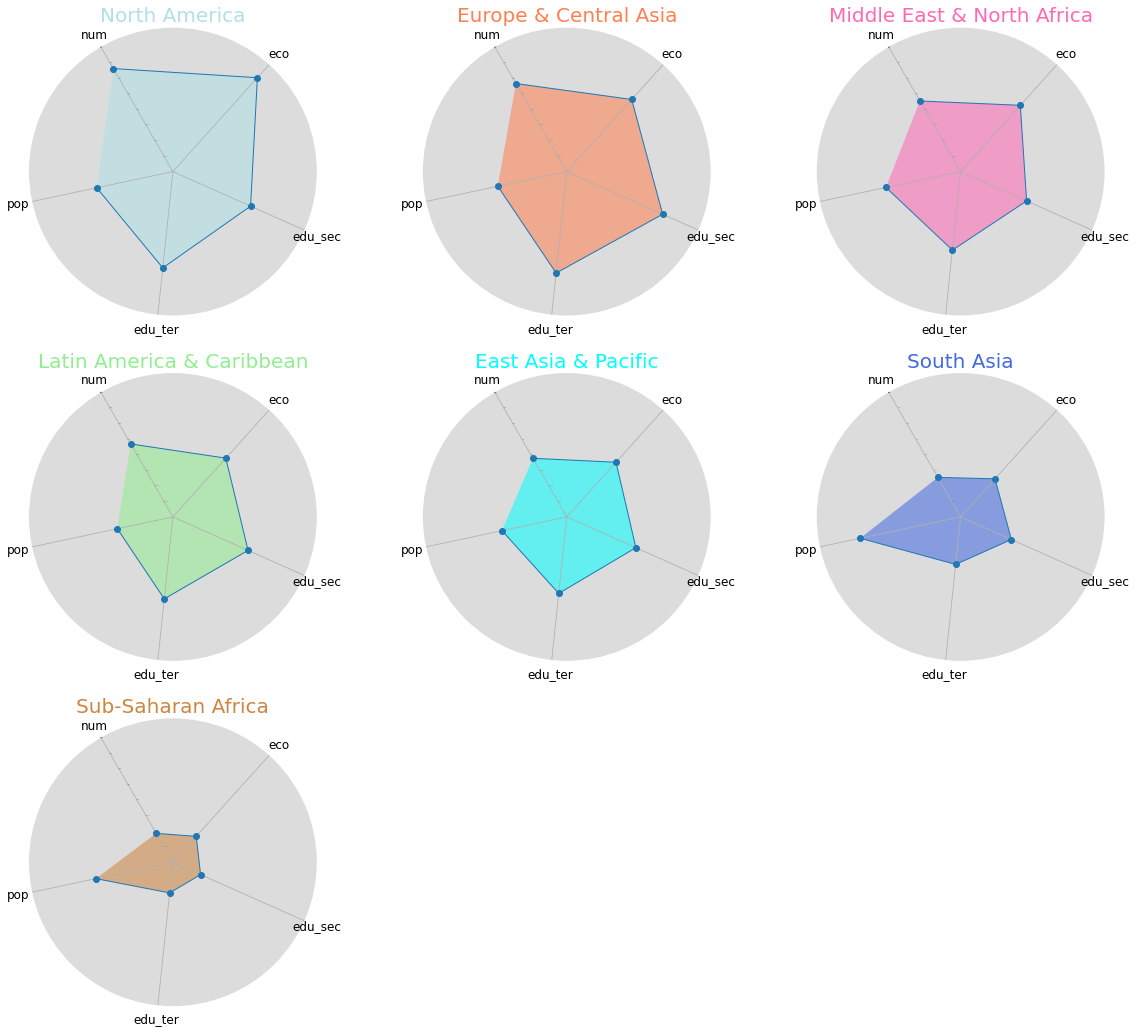

In [84]:
df_plot = df_score_region[['num','eco','edu_sec','edu_ter','pop']]
plt.rc('axes', facecolor = 'Gainsboro')

# number of variable
categories=list(df_plot.columns)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
    
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

##### Score d'attractivité par groupe de revenus

In [85]:
df_score_income = df_score_scaled_region.groupby('Income Group').mean()
df_score_income=df_score_income.rename(columns={'IT.NET.USER.P2':'num',
                                                'NY.GNP.PCAP.PP.CD':'eco',
                                                'SE.SEC.ENRR':'edu_sec',
                                                'SE.TER.ENRR':'edu_ter',
                                                 'SP.POP.1524.TO.UN':'pop'})

df_score_income=df_score_income.sort_values(by='Score', ascending=False)

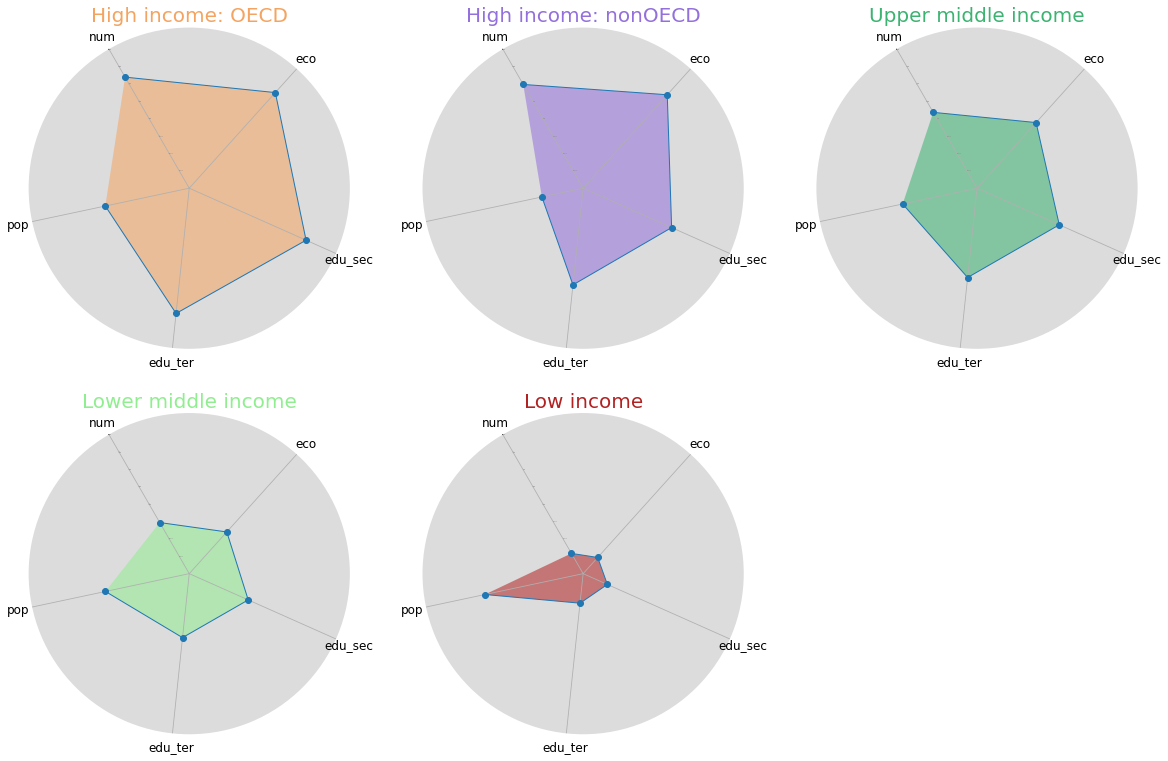

In [86]:
df_plot = df_score_income[['num','eco','edu_sec','edu_ter','pop']]

plt.rc('axes', facecolor = 'Gainsboro')

# number of variable
categories=list(df_plot.columns)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,13))
    
colors = ['SandyBrown', 'MediumPurple', 'MediumSeaGreen', 'LightGreen', 'FireBrick']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(2,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=16)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

**TOP 10 pays les plus attractifs**

In [87]:
df_top10_prov = df_score_scaled[['Country Name','Score']].sort_values(by='Score',ascending=False).head(10)
df_top10_prov['Place Provisoire']=np.arange(1, 11, 1)
df_top10_prov.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top10_prov.set_index('Place Provisoire')

,Pays,Score
Place Provisoire,,
1,United States,18.62895
2,Australia,16.54571
3,United Kingdom,16.50370
4,Belgium,16.26677
5,Japan,15.98642
6,Netherlands,15.82717
7,Spain,15.82231
8,"Korea, Rep.",15.77862
9,Germany,15.40811


### 6. Prédictions

**Méthode de Holt's**

In [88]:
from statsmodels.tsa.api import Holt

In [89]:
# Données de prédictions existent pour nos pays Top10 pour les années 2020-2040?
df_score_holt=data[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']]
#  Variables quantitatives
df_numeric = df_score_holt[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']]
# Variables qualitatives
df_categ = df_score_holt.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']]
df_numeric.interpolate(method='linear', axis=1, inplace=True)
df_score_holt = pd.concat([df_categ, df_numeric], axis=1)
# Filtre par codes indicateurs retenus
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']
mask_indic=df_score_holt['Indicator Code'].isin(cols)
# Filtre par les pays Top 10
pays_top10=df_top10_prov['Pays'].tolist()
mask_top10=df_score_holt['Country Name'].isin(pays_top10)
# Dataframe avec les données de prédictions
df_score_holt=df_score_holt[mask_indic][mask_top10]
df_score_holt

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
129527,Australia,AUS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2.56400e+04,2.66600e+04,2.79400e+04,2.88900e+04,3.04500e+04,3.13800e+04,3.30200e+04,3.49600e+04,3.59800e+04,3.88800e+04,3.76700e+04,4.01000e+04,4.13200e+04,4.45300e+04,4.52200e+04,4.55100e+04,4.59700e+04
129610,Australia,AUS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,1.62610e+02,1.54984e+02,1.54312e+02,1.56194e+02,1.49942e+02,1.48366e+02,1.27390e+02,1.26366e+02,1.28034e+02,1.30319e+02,1.32457e+02,1.34268e+02,1.36880e+02,1.37582e+02,1.37565e+02,1.37565e+02,1.37565e+02
129614,Australia,AUS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,6.70389e+01,6.70051e+01,7.57524e+01,7.33943e+01,7.16984e+01,7.22919e+01,7.14829e+01,7.25200e+01,7.29185e+01,7.67654e+01,8.09171e+01,8.34708e+01,8.54139e+01,8.65546e+01,9.03065e+01,9.03065e+01,9.03065e+01
129650,Australia,AUS,Internet users (per 100 people),IT.NET.USER.P2,4.67561e+01,5.26893e+01,5.52669e+01,5.78446e+01,6.04223e+01,6.30000e+01,6.60000e+01,6.94500e+01,7.16700e+01,7.42500e+01,7.60000e+01,7.94877e+01,7.90000e+01,8.34535e+01,8.40000e+01,8.45605e+01,8.82387e+01
130757,Australia,AUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.62117e+06,2.64178e+06,2.67765e+06,2.72283e+06,2.76868e+06,2.80872e+06,2.84112e+06,2.86712e+06,2.88715e+06,2.90254e+06,2.91432e+06,2.92244e+06,2.92639e+06,2.92625e+06,2.92221e+06,2.91462e+06,2.91462e+06
158847,Belgium,BEL,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,2.86700e+04,2.95500e+04,3.09900e+04,3.16300e+04,3.26900e+04,3.37200e+04,3.58900e+04,3.73400e+04,3.90300e+04,3.80900e+04,4.13900e+04,4.16600e+04,4.33900e+04,4.41700e+04,4.50300e+04,4.56400e+04,4.60100e+04
158930,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,1.44675e+02,1.53784e+02,1.55860e+02,1.58988e+02,1.07916e+02,1.08354e+02,1.08504e+02,1.07871e+02,1.06413e+02,1.05696e+02,1.05786e+02,1.06481e+02,1.06309e+02,1.63101e+02,1.64812e+02,1.66808e+02,1.66808e+02
158934,Belgium,BEL,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.75498e+01,5.82453e+01,5.91163e+01,5.98648e+01,6.12480e+01,6.14042e+01,6.19589e+01,6.13498e+01,6.21022e+01,6.51981e+01,6.77109e+01,6.97256e+01,7.12444e+01,7.23096e+01,7.33188e+01,7.50368e+01,7.50368e+01
158970,Belgium,BEL,Internet users (per 100 people),IT.NET.USER.P2,2.94317e+01,3.12884e+01,4.63300e+01,4.99700e+01,5.38600e+01,5.58200e+01,5.97200e+01,6.44400e+01,6.60000e+01,7.00000e+01,7.50000e+01,8.16100e+01,8.07200e+01,8.21702e+01,8.50000e+01,8.50529e+01,8.65165e+01
160077,Belgium,BEL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1.23162e+06,1.23205e+06,1.23615e+06,1.24254e+06,1.24936e+06,1.25517e+06,1.25945e+06,1.26232e+06,1.26378e+06,1.26405e+06,1.26329e+06,1.26144e+06,1.25835e+06,1.25403e+06,1.24853e+06,1.24195e+06,1.24195e+06


In [90]:
cols_holt=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015','2016']
x_index=pd.date_range(start='2000', end='2017', freq='A')

# ----------------------------------------------------------------------------------------------------------------------
# Indicateurs économique - NY.GNP.PCAP.PP.CD
# -----------------------------------------------------------------------------------------------------------------------

# Préparation du jeu de données
df_holt_eco=df_score_holt[df_score_holt['Indicator Code']=='NY.GNP.PCAP.PP.CD'][cols_holt]
# Australie
ind_eco_aus=df_holt_eco[df_score_holt['Country Name']=='Australia'].values.tolist()[0]
y_eco_aus = pd.Series(ind_eco_aus, x_index)
# Belgique
ind_eco_bel=df_holt_eco[df_score_holt['Country Name']=='Belgium'].values.tolist()[0]
y_eco_bel = pd.Series(ind_eco_bel, x_index)
# Allemagne
ind_eco_deu=df_holt_eco[df_score_holt['Country Name']=='Germany'].values.tolist()[0]
y_eco_deu = pd.Series(ind_eco_deu, x_index)
# Japon
ind_eco_jpn=df_holt_eco[df_score_holt['Country Name']=='Japan'].values.tolist()[0]
y_eco_jpn = pd.Series(ind_eco_jpn, x_index)
# Corée du Sud
ind_eco_kor=df_holt_eco[df_score_holt['Country Name']=='Korea, Rep.'].values.tolist()[0]
y_eco_kor = pd.Series(ind_eco_kor, x_index)
# Pays-bas
ind_eco_nld=df_holt_eco[df_score_holt['Country Name']=='Netherlands'].values.tolist()[0]
y_eco_nld = pd.Series(ind_eco_nld, x_index)
# Russie
ind_eco_rus=df_holt_eco[df_score_holt['Country Name']=='Russian Federation'].values.tolist()[0]
y_eco_rus = pd.Series(ind_eco_rus, x_index)
# Espagne
ind_eco_esp=df_holt_eco[df_score_holt['Country Name']=='Spain'].values.tolist()[0]
y_eco_esp = pd.Series(ind_eco_esp, x_index)
# Royaume-Unis 
ind_eco_gbr=df_holt_eco[df_score_holt['Country Name']=='United Kingdom'].values.tolist()[0]
y_eco_gbr = pd.Series(ind_eco_gbr, x_index)
# Etats-Unis
ind_eco_usa=df_holt_eco[df_score_holt['Country Name']=='United States'].values.tolist()[0]
y_eco_usa = pd.Series(ind_eco_usa, x_index)

# Entrainement du modèle
fit1 = Holt(y_eco_aus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast1 = fit1.forecast(3).rename('Australia')
fit2 = Holt(y_eco_bel, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast2 = fit2.forecast(3).rename('Belgique')
fit3 = Holt(y_eco_deu, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast3 = fit3.forecast(3).rename('Allemagne')
fit4 = Holt(y_eco_jpn, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast4 = fit4.forecast(3).rename('Japon')
fit5 = Holt(y_eco_kor, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast5 = fit5.forecast(3).rename('Corée Sud')
fit6 = Holt(y_eco_nld, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast6 = fit6.forecast(3).rename('Pays-Bas')
fit7 = Holt(y_eco_rus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast7 = fit7.forecast(3).rename('Russie')
fit8 = Holt(y_eco_esp, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast8 = fit8.forecast(3).rename('Espagne')
fit9 = Holt(y_eco_gbr, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast9 = fit9.forecast(3).rename('Royaume-Unis')
fit10 = Holt(y_eco_usa, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast10 = fit10.forecast(3).rename('Etats-Unis')

# Sauvegarde de la prédiction éco pour scoring
df_prediction = pd.DataFrame(index=np.arange(0, 50), columns=('Country Name','Indicator Code','2017','2018','2019') )
df_prediction.loc[0] = ['Australia', 'NY.GNP.PCAP.PP.CD', fcast1[0], fcast1[1], fcast1[2]]
df_prediction.loc[1] = ['Belgium', 'NY.GNP.PCAP.PP.CD', fcast2[0], fcast2[1], fcast2[2]]
df_prediction.loc[2] = ['Germany', 'NY.GNP.PCAP.PP.CD', fcast3[0], fcast3[1], fcast3[2]]
df_prediction.loc[3] = ['Japan', 'NY.GNP.PCAP.PP.CD', fcast4[0], fcast4[1], fcast4[2]]
df_prediction.loc[4] = ['Korea, Rep.', 'NY.GNP.PCAP.PP.CD', fcast5[0], fcast5[1], fcast5[2]]
df_prediction.loc[5] = ['Netherlands', 'NY.GNP.PCAP.PP.CD', fcast6[0], fcast6[1], fcast6[2]]
df_prediction.loc[6] = ['Russian Federation', 'NY.GNP.PCAP.PP.CD', fcast7[0], fcast7[1], fcast7[2]]
df_prediction.loc[7] = ['Spain', 'NY.GNP.PCAP.PP.CD', fcast8[0], fcast8[1], fcast8[2]]
df_prediction.loc[8] = ['United Kingdom', 'NY.GNP.PCAP.PP.CD', fcast9[0], fcast9[1], fcast9[2]]
df_prediction.loc[9] = ['United States', 'NY.GNP.PCAP.PP.CD', fcast10[0], fcast10[1], fcast10[2]]

# -----------------------------------------------------------------------------------------------------------------------
# Indicateurs démographique - SP.POP.1524.TO.UN
# -----------------------------------------------------------------------------------------------------------------------

# Préparation du jeu de données
df_holt_pop=df_score_holt[df_score_holt['Indicator Code']=='SP.POP.1524.TO.UN'][cols_holt]
# Australie
ind_pop_aus=df_holt_pop[df_score_holt['Country Name']=='Australia'].values.tolist()[0]
y_pop_aus = pd.Series(ind_pop_aus, x_index)
# Belgique
ind_pop_bel=df_holt_pop[df_score_holt['Country Name']=='Belgium'].values.tolist()[0]
y_pop_bel = pd.Series(ind_pop_bel, x_index)
# Allemagne
ind_pop_deu=df_holt_pop[df_score_holt['Country Name']=='Germany'].values.tolist()[0]
y_pop_deu = pd.Series(ind_pop_deu, x_index)
# Japon
ind_pop_jpn=df_holt_pop[df_score_holt['Country Name']=='Japan'].values.tolist()[0]
y_pop_jpn = pd.Series(ind_pop_jpn, x_index)
# Corée du Sud
ind_pop_kor=df_holt_pop[df_score_holt['Country Name']=='Korea, Rep.'].values.tolist()[0]
y_pop_kor = pd.Series(ind_pop_kor, x_index)
# Pays-bas
ind_pop_nld=df_holt_pop[df_score_holt['Country Name']=='Netherlands'].values.tolist()[0]
y_pop_nld = pd.Series(ind_pop_nld, x_index)
# Russie
ind_pop_rus=df_holt_pop[df_score_holt['Country Name']=='Russian Federation'].values.tolist()[0]
y_pop_rus = pd.Series(ind_pop_rus, x_index)
# Espagne
ind_pop_esp=df_holt_pop[df_score_holt['Country Name']=='Spain'].values.tolist()[0]
y_pop_esp = pd.Series(ind_pop_esp, x_index)
# Royaume-Unis 
ind_pop_gbr=df_holt_pop[df_score_holt['Country Name']=='United Kingdom'].values.tolist()[0]
y_pop_gbr = pd.Series(ind_pop_gbr, x_index)
# Etats-Unis
ind_pop_usa=df_holt_pop[df_score_holt['Country Name']=='United States'].values.tolist()[0]
y_pop_usa = pd.Series(ind_pop_usa, x_index)

# Entrainement du modèle
fit11 = Holt(y_pop_aus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast11 = fit11.forecast(3).rename('Australia')
fit12 = Holt(y_pop_bel, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast12 = fit12.forecast(3).rename('Belgique')
fit13 = Holt(y_pop_deu, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast13 = fit13.forecast(3).rename('Allemagne')
fit14 = Holt(y_pop_jpn, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast14 = fit14.forecast(3).rename('Japon')
fit15 = Holt(y_pop_kor, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast15 = fit15.forecast(3).rename('Corée Sud')
fit16 = Holt(y_pop_nld, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast16 = fit16.forecast(3).rename('Pays-Bas')
fit17 = Holt(y_pop_rus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast17 = fit17.forecast(3).rename('Russie')
fit18 = Holt(y_pop_esp, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast18 = fit18.forecast(3).rename('Espagne')
fit19 = Holt(y_pop_gbr, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast19 = fit19.forecast(3).rename('Royaume-Unis')
fit20 = Holt(y_pop_usa, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast20 = fit20.forecast(3).rename('Etats-Unis')

# Sauvegarde de la prédiction pop pour scoring
df_prediction.loc[10] = ['Australia', 'SP.POP.1524.TO.UN', fcast11[0], fcast11[1], fcast11[2]]
df_prediction.loc[11] = ['Belgium', 'SP.POP.1524.TO.UN', fcast12[0], fcast12[1], fcast12[2]]
df_prediction.loc[12] = ['Germany', 'SP.POP.1524.TO.UN', fcast13[0], fcast13[1], fcast13[2]]
df_prediction.loc[13] = ['Japan', 'SP.POP.1524.TO.UN', fcast14[0], fcast14[1], fcast14[2]]
df_prediction.loc[14] = ['Korea, Rep.', 'SP.POP.1524.TO.UN', fcast15[0], fcast15[1], fcast15[2]]
df_prediction.loc[15] = ['Netherlands', 'SP.POP.1524.TO.UN', fcast16[0], fcast16[1], fcast16[2]]
df_prediction.loc[16] = ['Russian Federation', 'SP.POP.1524.TO.UN', fcast17[0], fcast17[1], fcast17[2]]
df_prediction.loc[17] = ['Spain', 'SP.POP.1524.TO.UN', fcast18[0], fcast18[1], fcast18[2]]
df_prediction.loc[18] = ['United Kingdom', 'SP.POP.1524.TO.UN', fcast19[0], fcast19[1], fcast19[2]]
df_prediction.loc[19] = ['United States', 'SP.POP.1524.TO.UN', fcast20[0], fcast20[1], fcast20[2]]

# -----------------------------------------------------------------------------------------------------------------------
# Indicateurs éducatif lycée - SE.SEC.ENRR
# -----------------------------------------------------------------------------------------------------------------------

# Préparation du jeu de données
df_holt_edu_sec=df_score_holt[df_score_holt['Indicator Code']=='SE.SEC.ENRR'][cols_holt]
# Australie
ind_edu_sec_aus=df_holt_edu_sec[df_score_holt['Country Name']=='Australia'].values.tolist()[0]
y_edu_sec_aus = pd.Series(ind_edu_sec_aus, x_index)
# Belgique
ind_edu_sec_bel=df_holt_edu_sec[df_score_holt['Country Name']=='Belgium'].values.tolist()[0]
y_edu_sec_bel = pd.Series(ind_edu_sec_bel, x_index)
# Allemagne
ind_edu_sec_deu=df_holt_edu_sec[df_score_holt['Country Name']=='Germany'].values.tolist()[0]
y_edu_sec_deu = pd.Series(ind_edu_sec_deu, x_index)
# Japon
ind_edu_sec_jpn=df_holt_edu_sec[df_score_holt['Country Name']=='Japan'].values.tolist()[0]
y_edu_sec_jpn = pd.Series(ind_edu_sec_jpn, x_index)
# Corée du Sud
ind_edu_sec_kor=df_holt_edu_sec[df_score_holt['Country Name']=='Korea, Rep.'].values.tolist()[0]
y_edu_sec_kor = pd.Series(ind_edu_sec_kor, x_index)
# Pays-bas
ind_edu_sec_nld=df_holt_edu_sec[df_score_holt['Country Name']=='Netherlands'].values.tolist()[0]
y_edu_sec_nld = pd.Series(ind_edu_sec_nld, x_index)
# Russie
ind_edu_sec_rus=df_holt_edu_sec[df_score_holt['Country Name']=='Russian Federation'].values.tolist()[0]
y_edu_sec_rus = pd.Series(ind_edu_sec_rus, x_index)
y_edu_sec_rus=y_edu_sec_rus.fillna(80)
# Espagne
ind_edu_sec_esp=df_holt_edu_sec[df_score_holt['Country Name']=='Spain'].values.tolist()[0]
y_edu_sec_esp = pd.Series(ind_edu_sec_esp, x_index)
# Royaume-Unis 
ind_edu_sec_gbr=df_holt_edu_sec[df_score_holt['Country Name']=='United Kingdom'].values.tolist()[0]
y_edu_sec_gbr = pd.Series(ind_edu_sec_gbr, x_index)
# Etats-Unis
ind_edu_sec_usa=df_holt_edu_sec[df_score_holt['Country Name']=='United States'].values.tolist()[0]
y_edu_sec_usa = pd.Series(ind_edu_sec_usa, x_index)

# Entrainement du modèle
fit21 = Holt(y_edu_sec_aus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast21 = fit21.forecast(3).rename('Australia')
fit22 = Holt(y_edu_sec_bel, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast22 = fit22.forecast(3).rename('Belgique')
fit23 = Holt(y_edu_sec_deu, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast23 = fit23.forecast(3).rename('Allemagne')
fit24 = Holt(y_edu_sec_jpn, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast24 = fit24.forecast(3).rename('Japon')
fit25 = Holt(y_edu_sec_kor, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast25 = fit25.forecast(3).rename('Corée Sud')
fit26 = Holt(y_edu_sec_nld, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast26 = fit26.forecast(3).rename('Pays-Bas')
fit27 = Holt(y_edu_sec_rus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast27 = fit27.forecast(3).rename('Russie')
fit28 = Holt(y_edu_sec_esp, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast28 = fit28.forecast(3).rename('Espagne')
fit29 = Holt(y_edu_sec_gbr, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast29 = fit29.forecast(3).rename('Royaume-Unis')
fit30 = Holt(y_edu_sec_usa, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast30 = fit30.forecast(3).rename('Etats-Unis')

# Sauvegarde de la prédiction édu_sec pour scoring
df_prediction.loc[20] = ['Australia', 'SE.SEC.ENRR', fcast21[0], fcast21[1], fcast21[2]]
df_prediction.loc[21] = ['Belgium', 'SE.SEC.ENRR', fcast22[0], fcast22[1], fcast22[2]]
df_prediction.loc[22] = ['Germany', 'SE.SEC.ENRR', fcast23[0], fcast23[1], fcast23[2]]
df_prediction.loc[23] = ['Japan', 'SE.SEC.ENRR', fcast24[0], fcast24[1], fcast24[2]]
df_prediction.loc[24] = ['Korea, Rep.', 'SE.SEC.ENRR', fcast25[0], fcast25[1], fcast25[2]]
df_prediction.loc[25] = ['Netherlands', 'SE.SEC.ENRR', fcast26[0], fcast26[1], fcast26[2]]
df_prediction.loc[26] = ['Russian Federation', 'SE.SEC.ENRR', fcast27[0], fcast27[1], fcast27[2]]
df_prediction.loc[27] = ['Spain', 'SE.SEC.ENRR', fcast28[0], fcast28[1], fcast28[2]]
df_prediction.loc[28] = ['United Kingdom', 'SE.SEC.ENRR', fcast29[0], fcast29[1], fcast29[2]]
df_prediction.loc[29] = ['United States', 'SE.SEC.ENRR', fcast30[0], fcast30[1], fcast30[2]]

# -----------------------------------------------------------------------------------------------------------------------
# Indicateurs éducatif enseignement supérieur - SE.TER.ENRR
# -----------------------------------------------------------------------------------------------------------------------

# Préparation du jeu de données
df_holt_edu_ter=df_score_holt[df_score_holt['Indicator Code']=='SE.TER.ENRR'][cols_holt]
# Australie
ind_edu_ter_aus=df_holt_edu_ter[df_score_holt['Country Name']=='Australia'].values.tolist()[0]
y_edu_ter_aus = pd.Series(ind_edu_ter_aus, x_index)
# Belgique
ind_edu_ter_bel=df_holt_edu_ter[df_score_holt['Country Name']=='Belgium'].values.tolist()[0]
y_edu_ter_bel = pd.Series(ind_edu_ter_bel, x_index)
# Allemagne
ind_edu_ter_deu=df_holt_edu_ter[df_score_holt['Country Name']=='Germany'].values.tolist()[0]
y_edu_ter_deu = pd.Series(ind_edu_ter_deu, x_index)
y_edu_ter_deu=y_edu_ter_deu.fillna(60)
# Japon
ind_edu_ter_jpn=df_holt_edu_ter[df_score_holt['Country Name']=='Japan'].values.tolist()[0]
y_edu_ter_jpn = pd.Series(ind_edu_ter_jpn, x_index)
# Corée du Sud
ind_edu_ter_kor=df_holt_edu_ter[df_score_holt['Country Name']=='Korea, Rep.'].values.tolist()[0]
y_edu_ter_kor = pd.Series(ind_edu_ter_kor, x_index)
# Pays-bas
ind_edu_ter_nld=df_holt_edu_ter[df_score_holt['Country Name']=='Netherlands'].values.tolist()[0]
y_edu_ter_nld = pd.Series(ind_edu_ter_nld, x_index)
# Russie
ind_edu_ter_rus=df_holt_edu_ter[df_score_holt['Country Name']=='Russian Federation'].values.tolist()[0]
y_edu_ter_rus = pd.Series(ind_edu_ter_rus, x_index)
# Espagne
ind_edu_ter_esp=df_holt_edu_ter[df_score_holt['Country Name']=='Spain'].values.tolist()[0]
y_edu_ter_esp = pd.Series(ind_edu_ter_esp, x_index)
# Royaume-Unis 
ind_edu_ter_gbr=df_holt_edu_ter[df_score_holt['Country Name']=='United Kingdom'].values.tolist()[0]
y_edu_ter_gbr = pd.Series(ind_edu_ter_gbr, x_index)
# Etats-Unis
ind_edu_ter_usa=df_holt_edu_ter[df_score_holt['Country Name']=='United States'].values.tolist()[0]
y_edu_ter_usa = pd.Series(ind_edu_ter_usa, x_index)

# Entrainement du modèle
fit31 = Holt(y_edu_ter_aus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast31 = fit31.forecast(3).rename('Australia')
fit32 = Holt(y_edu_ter_bel, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast32 = fit32.forecast(3).rename('Belgique')
fit33 = Holt(y_edu_ter_deu, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast33 = fit33.forecast(3).rename('Allemagne')
fit34 = Holt(y_edu_ter_jpn, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast34 = fit34.forecast(3).rename('Japon')
fit35 = Holt(y_edu_ter_kor, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast35 = fit35.forecast(3).rename('Corée Sud')
fit36 = Holt(y_edu_ter_nld, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast36 = fit36.forecast(3).rename('Pays-Bas')
fit37 = Holt(y_edu_ter_rus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast37 = fit37.forecast(3).rename('Russie')
fit38 = Holt(y_edu_ter_esp, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast38 = fit38.forecast(3).rename('Espagne')
fit39 = Holt(y_edu_ter_gbr, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast39 = fit39.forecast(3).rename('Royaume-Unis')
fit40 = Holt(y_edu_ter_usa, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast40 = fit40.forecast(3).rename('Etats-Unis')

# Sauvegarde de la prédiction éduc_ter pour scoring
df_prediction.loc[30] = ['Australia', 'SE.TER.ENRR', fcast31[0], fcast31[1], fcast31[2]]
df_prediction.loc[31] = ['Belgium', 'SE.TER.ENRR', fcast32[0], fcast32[1], fcast32[2]]
df_prediction.loc[32] = ['Germany', 'SE.TER.ENRR', fcast33[0], fcast33[1], fcast33[2]]
df_prediction.loc[33] = ['Japan', 'SE.TER.ENRR', fcast34[0], fcast34[1], fcast34[2]]
df_prediction.loc[34] = ['Korea, Rep.', 'SE.TER.ENRR', fcast35[0], fcast35[1], fcast35[2]]
df_prediction.loc[35] = ['Netherlands', 'SE.TER.ENRR', fcast36[0], fcast36[1], fcast36[2]]
df_prediction.loc[36] = ['Russian Federation', 'SE.TER.ENRR', fcast37[0], fcast37[1], fcast37[2]]
df_prediction.loc[37] = ['Spain', 'SE.TER.ENRR', fcast38[0], fcast38[1], fcast38[2]]
df_prediction.loc[38] = ['United Kingdom', 'SE.TER.ENRR', fcast39[0], fcast39[1], fcast39[2]]
df_prediction.loc[39] = ['United States', 'SE.TER.ENRR', fcast40[0], fcast40[1], fcast40[2]]

# -----------------------------------------------------------------------------------------------------------------------
# Indicateurs numérique - IT.NET.USER.P2
# -----------------------------------------------------------------------------------------------------------------------

# Préparation du jeu de données
df_holt_num=df_score_holt[df_score_holt['Indicator Code']=='IT.NET.USER.P2'][cols_holt]
# Australie
ind_num_aus=df_holt_num[df_score_holt['Country Name']=='Australia'].values.tolist()[0]
y_num_aus = pd.Series(ind_num_aus, x_index)
# Belgique
ind_num_bel=df_holt_num[df_score_holt['Country Name']=='Belgium'].values.tolist()[0]
y_num_bel = pd.Series(ind_num_bel, x_index)
# Allemagne
ind_num_deu=df_holt_num[df_score_holt['Country Name']=='Germany'].values.tolist()[0]
y_num_deu = pd.Series(ind_num_deu, x_index)
# Japon
ind_num_jpn=df_holt_num[df_score_holt['Country Name']=='Japan'].values.tolist()[0]
y_num_jpn = pd.Series(ind_num_jpn, x_index)
# Corée du Sud
ind_num_kor=df_holt_num[df_score_holt['Country Name']=='Korea, Rep.'].values.tolist()[0]
y_num_kor = pd.Series(ind_num_kor, x_index)
# Pays-bas
ind_num_nld=df_holt_num[df_score_holt['Country Name']=='Netherlands'].values.tolist()[0]
y_num_nld = pd.Series(ind_num_nld, x_index)
# Russie
ind_num_rus=df_holt_num[df_score_holt['Country Name']=='Russian Federation'].values.tolist()[0]
y_num_rus = pd.Series(ind_num_rus, x_index)
# Espagne
ind_num_esp=df_holt_num[df_score_holt['Country Name']=='Spain'].values.tolist()[0]
y_num_esp = pd.Series(ind_num_esp, x_index)
# Royaume-Unis 
ind_num_gbr=df_holt_num[df_score_holt['Country Name']=='United Kingdom'].values.tolist()[0]
y_num_gbr = pd.Series(ind_num_gbr, x_index)
# Etats-Unis
ind_num_usa=df_holt_num[df_score_holt['Country Name']=='United States'].values.tolist()[0]
y_num_usa = pd.Series(ind_num_usa, x_index)

# Entrainement du modèle
fit41 = Holt(y_num_aus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast41 = fit41.forecast(3).rename('Australia')
fit42 = Holt(y_num_bel, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast42 = fit42.forecast(3).rename('Belgique')
fit43 = Holt(y_num_deu, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast43 = fit43.forecast(3).rename('Allemagne')
fit44 = Holt(y_num_jpn, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast44 = fit44.forecast(3).rename('Japon')
fit45 = Holt(y_num_kor, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast45 = fit45.forecast(3).rename('Corée Sud')
fit46 = Holt(y_num_nld, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast46 = fit46.forecast(3).rename('Pays-Bas')
fit47 = Holt(y_num_rus, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast47 = fit47.forecast(3).rename('Russie')
fit48 = Holt(y_num_esp, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast48 = fit48.forecast(3).rename('Espagne')
fit49 = Holt(y_num_gbr, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast49 = fit49.forecast(3).rename('Royaume-Unis')
fit50 = Holt(y_num_usa, exponential=True, initialization_method='estimated').fit(optimized=True)
fcast50 = fit50.forecast(3).rename('Etats-Unis')

# Sauvegarde de la prédiction num pour scoring
df_prediction.loc[40] = ['Australia', 'IT.NET.USER.P2', fcast41[0], fcast41[1], fcast41[2]]
df_prediction.loc[41] = ['Belgium', 'IT.NET.USER.P2', fcast42[0], fcast42[1], fcast42[2]]
df_prediction.loc[42] = ['Germany', 'IT.NET.USER.P2', fcast43[0], fcast43[1], fcast43[2]]
df_prediction.loc[43] = ['Japan', 'IT.NET.USER.P2', fcast44[0], fcast44[1], fcast44[2]]
df_prediction.loc[44] = ['Korea, Rep.', 'IT.NET.USER.P2', fcast45[0], fcast45[1], fcast45[2]]
df_prediction.loc[45] = ['Netherlands', 'IT.NET.USER.P2', fcast46[0], fcast46[1], fcast46[2]]
df_prediction.loc[46] = ['Russian Federation', 'IT.NET.USER.P2', fcast47[0], fcast47[1], fcast47[2]]
df_prediction.loc[47] = ['Spain', 'IT.NET.USER.P2', fcast48[0], fcast48[1], fcast48[2]]
df_prediction.loc[48] = ['United Kingdom', 'IT.NET.USER.P2', fcast49[0], fcast49[1], fcast49[2]]
df_prediction.loc[49] = ['United States', 'IT.NET.USER.P2', fcast50[0], fcast50[1], fcast50[2]]

C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\elodi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to co

**VISUALISATION**

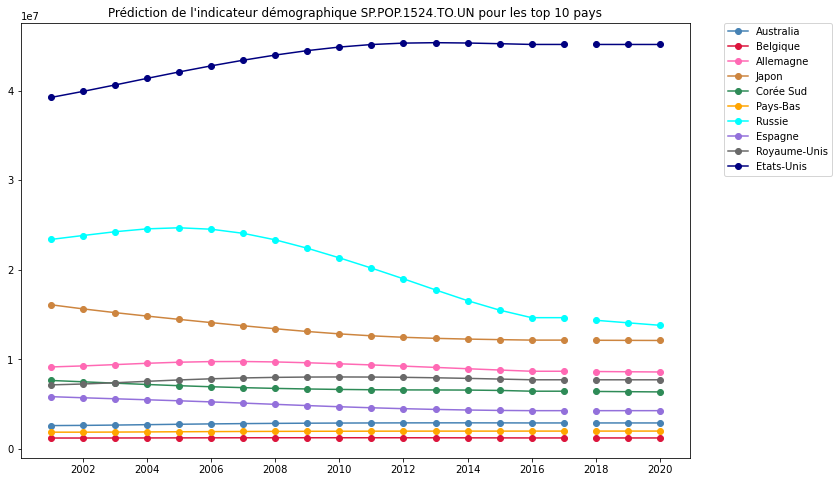

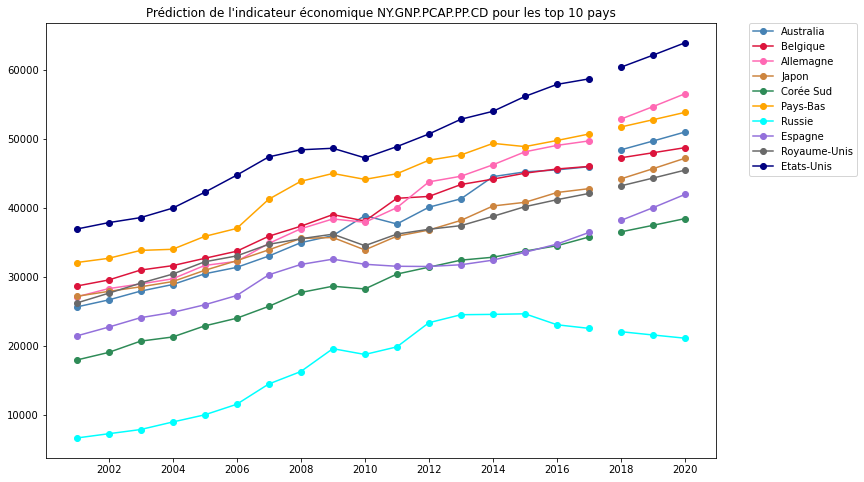

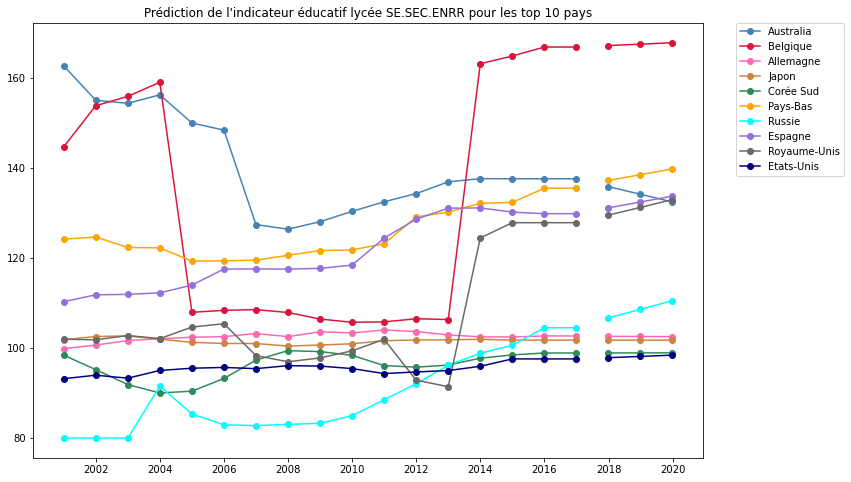

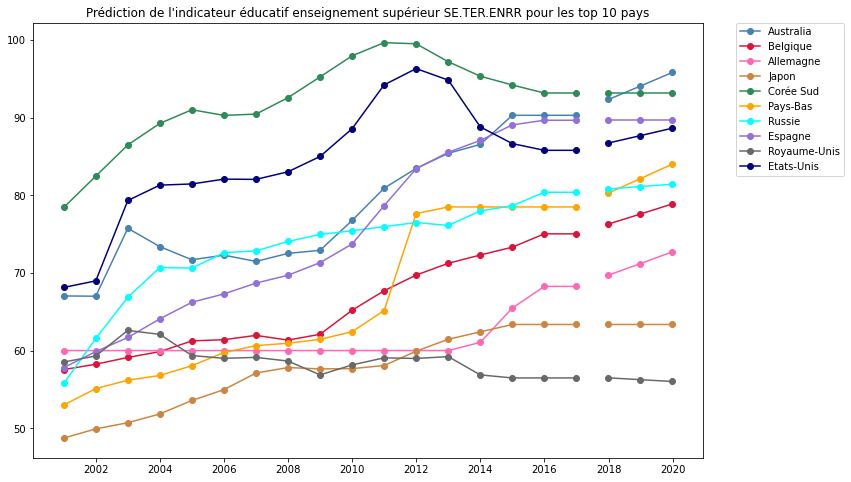

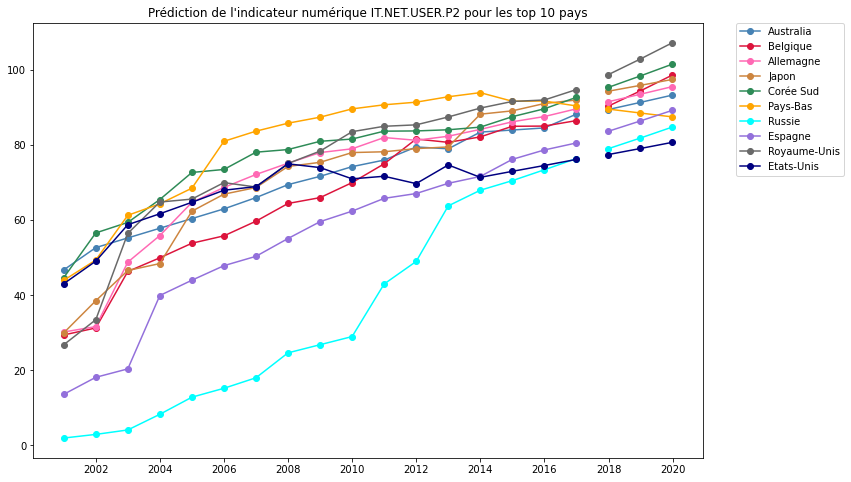

In [91]:
# Visualisation des prédictions
plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(y_pop_aus, marker='o', color='SteelBlue')
line11, = plt.plot(fcast11, marker='o', color='SteelBlue')
plt.plot(y_pop_bel, marker='o', color='Crimson')
line12, = plt.plot(fcast12, marker='o', color='Crimson')
plt.plot(y_pop_deu, marker='o', color='HotPink')
line13, = plt.plot(fcast13, marker='o', color='HotPink')
plt.plot(y_pop_jpn, marker='o', color='Peru')
line14, = plt.plot(fcast14, marker='o', color='Peru')
plt.plot(y_pop_kor, marker='o', color='SeaGreen')
line15, = plt.plot(fcast15, marker='o', color='SeaGreen')
plt.plot(y_pop_nld, marker='o', color='Orange')
line16, = plt.plot(fcast16, marker='o', color='Orange')
plt.plot(y_pop_rus, marker='o', color='Cyan')
line17, = plt.plot(fcast17, marker='o', color='Cyan')
plt.plot(y_pop_esp, marker='o', color='MediumPurple')
line18, = plt.plot(fcast18, marker='o', color='MediumPurple')
plt.plot(y_pop_gbr, marker='o', color='DimGray')
line19, = plt.plot(fcast19, marker='o', color='DimGray')
plt.plot(y_pop_usa, marker='o', color='Navy')
line20, = plt.plot(fcast20, marker='o', color='Navy')

plt.legend([line11, line12, line13, line14, line15, line16, line17, line18, line19, line20], 
           [fcast11.name, fcast12.name, fcast13.name, fcast14.name, fcast15.name, fcast16.name, fcast17.name, fcast18.name, fcast19.name, fcast20.name], 
           facecolor='white',
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_facecolor('white')
plt.title('Prédiction de l\'indicateur démographique SP.POP.1524.TO.UN pour les top 10 pays')
plt.show()

# Visualisation des prédictions
plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(y_eco_aus, marker='o', color='SteelBlue')
line1, = plt.plot(fcast1, marker='o', color='SteelBlue')
plt.plot(y_eco_bel, marker='o', color='Crimson')
line2, = plt.plot(fcast2, marker='o', color='Crimson')
plt.plot(y_eco_deu, marker='o', color='HotPink')
line3, = plt.plot(fcast3, marker='o', color='HotPink')
plt.plot(y_eco_jpn, marker='o', color='Peru')
line4, = plt.plot(fcast4, marker='o', color='Peru')
plt.plot(y_eco_kor, marker='o', color='SeaGreen')
line5, = plt.plot(fcast5, marker='o', color='SeaGreen')
plt.plot(y_eco_nld, marker='o', color='Orange')
line6, = plt.plot(fcast6, marker='o', color='Orange')
plt.plot(y_eco_rus, marker='o', color='Cyan')
line7, = plt.plot(fcast7, marker='o', color='Cyan')
plt.plot(y_eco_esp, marker='o', color='MediumPurple')
line8, = plt.plot(fcast8, marker='o', color='MediumPurple')
plt.plot(y_eco_gbr, marker='o', color='DimGray')
line9, = plt.plot(fcast9, marker='o', color='DimGray')
plt.plot(y_eco_usa, marker='o', color='Navy')
line10, = plt.plot(fcast10, marker='o', color='Navy')

plt.legend([line1, line2, line3, line4, line5, line6, line7, line8, line9, line10], 
           [fcast1.name, fcast2.name, fcast3.name, fcast4.name, fcast5.name, fcast6.name, fcast7.name, fcast8.name, fcast9.name, fcast10.name], 
           facecolor='white',
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_facecolor('white')
plt.title('Prédiction de l\'indicateur économique NY.GNP.PCAP.PP.CD pour les top 10 pays')
plt.show()


# Visualisation des prédictions
plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(y_edu_sec_aus, marker='o', color='SteelBlue')
line21, = plt.plot(fcast21, marker='o', color='SteelBlue')
plt.plot(y_edu_sec_bel, marker='o', color='Crimson')
line22, = plt.plot(fcast22, marker='o', color='Crimson')
plt.plot(y_edu_sec_deu, marker='o', color='HotPink')
line23, = plt.plot(fcast23, marker='o', color='HotPink')
plt.plot(y_edu_sec_jpn, marker='o', color='Peru')
line24, = plt.plot(fcast24, marker='o', color='Peru')
plt.plot(y_edu_sec_kor, marker='o', color='SeaGreen')
line25, = plt.plot(fcast25, marker='o', color='SeaGreen')
plt.plot(y_edu_sec_nld, marker='o', color='Orange')
line26, = plt.plot(fcast26, marker='o', color='Orange')
plt.plot(y_edu_sec_rus, marker='o', color='Cyan')
line27, = plt.plot(fcast27, marker='o', color='Cyan')
plt.plot(y_edu_sec_esp, marker='o', color='MediumPurple')
line28, = plt.plot(fcast28, marker='o', color='MediumPurple')
plt.plot(y_edu_sec_gbr, marker='o', color='DimGray')
line29, = plt.plot(fcast29, marker='o', color='DimGray')
plt.plot(y_edu_sec_usa, marker='o', color='Navy')
line30, = plt.plot(fcast30, marker='o', color='Navy')

plt.legend([line21, line22, line23, line24, line25, line26, line27, line28, line29, line30], 
           [fcast21.name, fcast22.name, fcast23.name, fcast24.name, fcast25.name, fcast26.name, fcast27.name, fcast28.name, fcast29.name, fcast30.name], 
           facecolor='white',
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_facecolor('white')
plt.title('Prédiction de l\'indicateur éducatif lycée SE.SEC.ENRR pour les top 10 pays')
plt.show()

# Visualisation des prédictions
plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(y_edu_ter_aus, marker='o', color='SteelBlue')
line31, = plt.plot(fcast31, marker='o', color='SteelBlue')
plt.plot(y_edu_ter_bel, marker='o', color='Crimson')
line32, = plt.plot(fcast32, marker='o', color='Crimson')
plt.plot(y_edu_ter_deu, marker='o', color='HotPink')
line33, = plt.plot(fcast33, marker='o', color='HotPink')
plt.plot(y_edu_ter_jpn, marker='o', color='Peru')
line34, = plt.plot(fcast34, marker='o', color='Peru')
plt.plot(y_edu_ter_kor, marker='o', color='SeaGreen')
line35, = plt.plot(fcast35, marker='o', color='SeaGreen')
plt.plot(y_edu_ter_nld, marker='o', color='Orange')
line36, = plt.plot(fcast36, marker='o', color='Orange')
plt.plot(y_edu_ter_rus, marker='o', color='Cyan')
line37, = plt.plot(fcast37, marker='o', color='Cyan')
plt.plot(y_edu_ter_esp, marker='o', color='MediumPurple')
line38, = plt.plot(fcast38, marker='o', color='MediumPurple')
plt.plot(y_edu_ter_gbr, marker='o', color='DimGray')
line39, = plt.plot(fcast39, marker='o', color='DimGray')
plt.plot(y_edu_ter_usa, marker='o', color='Navy')
line40, = plt.plot(fcast40, marker='o', color='Navy')

plt.legend([line31, line32, line33, line34, line35, line36, line37, line38, line39, line40], 
           [fcast31.name, fcast32.name, fcast33.name, fcast34.name, fcast35.name, fcast36.name, fcast37.name, fcast38.name, fcast39.name, fcast40.name], 
           facecolor='white',
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_facecolor('white')
plt.title('Prédiction de l\'indicateur éducatif enseignement supérieur SE.TER.ENRR pour les top 10 pays')
plt.show()

# Visualisation des prédictions
plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.plot(y_num_aus, marker='o', color='SteelBlue')
line41, = plt.plot(fcast41, marker='o', color='SteelBlue')
plt.plot(y_num_bel, marker='o', color='Crimson')
line42, = plt.plot(fcast42, marker='o', color='Crimson')
plt.plot(y_num_deu, marker='o', color='HotPink')
line43, = plt.plot(fcast43, marker='o', color='HotPink')
plt.plot(y_num_jpn, marker='o', color='Peru')
line44, = plt.plot(fcast44, marker='o', color='Peru')
plt.plot(y_num_kor, marker='o', color='SeaGreen')
line45, = plt.plot(fcast45, marker='o', color='SeaGreen')
plt.plot(y_num_nld, marker='o', color='Orange')
line46, = plt.plot(fcast46, marker='o', color='Orange')
plt.plot(y_num_rus, marker='o', color='Cyan')
line47, = plt.plot(fcast47, marker='o', color='Cyan')
plt.plot(y_num_esp, marker='o', color='MediumPurple')
line48, = plt.plot(fcast48, marker='o', color='MediumPurple')
plt.plot(y_num_gbr, marker='o', color='DimGray')
line49, = plt.plot(fcast49, marker='o', color='DimGray')
plt.plot(y_num_usa, marker='o', color='Navy')
line50, = plt.plot(fcast50, marker='o', color='Navy')

plt.legend([line41, line42, line43, line44, line45, line46, line47, line48, line49, line50], 
           [fcast41.name, fcast42.name, fcast43.name, fcast44.name, fcast45.name, fcast46.name, fcast47.name, fcast48.name, fcast49.name, fcast50.name], 
           facecolor='white',
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_facecolor('white')
plt.title('Prédiction de l\'indicateur numérique IT.NET.USER.P2 pour les top 10 pays')
plt.show()

#### Score prévisionnel pour l'année 2018

In [92]:
# Constitution du datframe des prédictions pour établir le score en 2018
df_prediction=df_prediction.astype({'2017': 'float64', '2018': 'float64', '2019': 'float64'})
df_score_prediction= df_prediction.pivot_table(index=['Country Name'], columns=['Indicator Code'], values= '2018')

In [93]:
cols = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']
scaler_pow_pred = PowerTransformer(method = 'box-cox')
df_score_prediction_scaled= scaler_pow_pred.fit_transform(df_score_prediction[cols])
df_score_prediction_scaled = pd.DataFrame(df_score_prediction_scaled, columns=cols)

In [94]:
# Calcul du score
df_score_prediction_scaled['Country Name'] = df_score_prediction.index
df_score_prediction_scaled['Score']=[(row[0] *4 + row[1] *1 + row[2] *2 + row[3] *3 + row[4]*4) for row in zip(df_score_prediction_scaled['IT.NET.USER.P2'], df_score_prediction_scaled['NY.GNP.PCAP.PP.CD'], df_score_prediction_scaled['SE.SEC.ENRR'], df_score_prediction_scaled['SE.TER.ENRR'], df_score_prediction_scaled['SP.POP.1524.TO.UN'])]
df_score_prediction_scaled.sort_values(by='Score',ascending=False);

#### TOP 10

In [95]:
df_top10_pred = df_score_prediction_scaled[['Country Name','Score']].sort_values(by='Score',ascending=False).head(10)
df_top10_pred['Place Prévisionnelle']=np.arange(1, 11, 1)
df_top10_pred.rename(columns={'Country Name': 'Pays','Score':'Score Prédit'}, inplace=True)
df_top10_pred.set_index('Pays')

,Score Prédit,Place Prévisionnelle
Pays,,
"Korea, Rep.",4.91638,1
United Kingdom,4.02275,2
Australia,2.79528,3
United States,2.14035,4
Japan,-0.66918,5
Germany,-0.79068,6
Spain,-0.99567,7
Belgium,-2.78106,8
Netherlands,-3.72203,9


#### Comparaison des scores : données réelles et prédites

In [96]:
df_top10_final=pd.merge(df_top10_prov, df_top10_pred, how='left', left_on='Pays', right_on='Pays')
df_top10_final['Score Finale']=[((row[0]*2 + row[1])/3) for row in zip(df_top10_final['Score'], df_top10_final['Score Prédit'])]
df_top10_final=df_top10_final.set_index('Pays')
df_top10_final.sort_values(by='Score Finale', ascending=False, inplace=True)
df_top10_final['Place Finale']=np.arange(1, 11, 1)
#Moyenne des 2 places pour classement final
df_top10_final

,Score,Place Provisoire,Score Prédit,Place Prévisionnelle,Score Finale,Place Finale
Pays,,,,,,
United States,18.62895,1,2.14035,4,13.13275,1
United Kingdom,16.50370,3,4.02275,2,12.34338,2
"Korea, Rep.",15.77862,8,4.91638,1,12.15787,3
Australia,16.54571,2,2.79528,3,11.96223,4
Japan,15.98642,5,-0.66918,5,10.43455,5
Spain,15.82231,7,-0.99567,7,10.21632,6
Germany,15.40811,9,-0.79068,6,10.00851,7
Belgium,16.26677,4,-2.78106,8,9.91749,8
Netherlands,15.82717,6,-3.72203,9,9.31077,9
